# SHAP方法

# DB数据集

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import regularizers
from keras.layers import Dense,Flatten,Conv1D,MaxPooling1D,Dropout,BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras import Model
from keras.layers import GRU
from keras import regularizers
from keras import initializers
from keras_self_attention import SeqSelfAttention, SeqWeightedAttention
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import datetime
from keras import constraints
import keras.backend as K 
import lime
from lime import lime_tabular
import matplotlib.pyplot as plt
import numpy as np
import shap
import time

D:\anaconda3\envs\tensorflow\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
D:\anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
D:\anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
D:\anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# -------------CNN-------------------

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


Running time: 984.6661128999999 Seconds


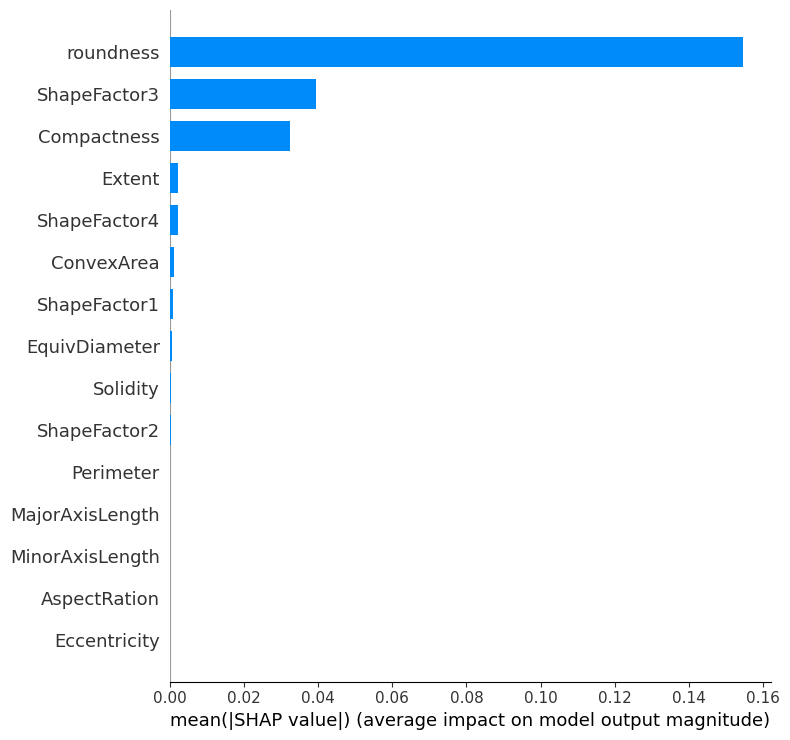

In [2]:
model = load_model('test_model\\test_mul.h5')#加载CNN模型
df = pd.read_csv("Dataset/test.csv",encoding="gbk")
x, y = df.iloc[:, 1:-1], df.iloc[:, -1]
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train = x_train.values.reshape((x_train.shape[0],x_train.shape[1],1))
x_test = x_test.values.reshape((x_test.shape[0], x_test.shape[1],1))
explainer = shap.GradientExplainer(model,x_train)
start = time.perf_counter()
shap_values = explainer.shap_values(x_test)
end = time.perf_counter()
print('Running time: %s Seconds'%(end-start))
shap_values_new = shap_values[0].squeeze(axis=-1)
x_test_new = x_test.squeeze(axis=-1)
column_names = df.columns[1:-1].tolist()
shap.summary_plot(shap_values_new,x_test_new,plot_type='bar',feature_names=column_names)

In [3]:
shap_test_mul_feature = np.abs(shap_values_new).mean(axis=0)
total = sum(shap_test_mul_feature)
shap_DB_cnn = [(x / total) * 100 for x in shap_test_mul_feature]

In [82]:
df = pd.read_csv("Dataset/test.csv",encoding="gbk")
column_names = df.columns[1:-1].tolist()
shap_DB_cnn_result = []
for i, name in enumerate(column_names):
    if shap_DB_cnn[i] < 0.2:
        shap_DB_cnn_result.append(name)
print(len(shap_DB_cnn_result))

7


In [83]:
df = pd.read_csv("Dataset/test.csv",encoding="gbk")
x, y = df.iloc[:, 1:-1], df.iloc[:, -1]
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
columns_to_drop = shap_DB_cnn_result
df_dropped = x.drop(columns=columns_to_drop)
x = df_dropped
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train = x_train.values.reshape((x_train.shape[0],x_train.shape[1],1))
x_test = x_test.values.reshape((x_test.shape[0], x_test.shape[1],1))
onehot = OneHotEncoder(sparse=False)
y_train = onehot.fit_transform(y_train.values.reshape(len(y_train), 1))
y_test = onehot.fit_transform(y_test.values.reshape(len(y_test), 1))
print(f'训练集的形状为：{x_train.shape}')

训练集的形状为：(19857, 8, 1)


In [84]:
inp=Input(shape=(x_train.shape[1:]))
x = Conv1D(32, 6, padding="same", activation='tanh')(inp)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Conv1D(64, kernel_size=6, strides=1, padding='same', activation='relu')(x)
x = Conv1D(64, 6, strides=1, padding='same', activation='relu')(x)
x = LeakyReLU(alpha=0.33)(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Conv1D(128, kernel_size=6, strides=1, padding='same', activation='relu')(x)
x = Conv1D(128, 6, strides=1, padding='same', activation='relu')(x)
x = LeakyReLU(alpha=0.33)(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Conv1D(256, kernel_size=6, strides=1, padding='same', activation='relu')(x)
x = Conv1D(256, 6, strides=1, padding='same', activation='relu')(x)
x = LeakyReLU(alpha=0.33)(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = Flatten()(x)
output = Dense(7, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='softmax')(x)
model = Model(inputs=inp,outputs=output)

In [85]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.001),  #优化器
              loss = 'categorical_crossentropy', #损失函数
              metrics = ['accuracy']
             )
lr_reduce=keras.callbacks.ReduceLROnPlateau('val_loss',patience=3,factor=0.5,min_lr=0.000001)
start = time.perf_counter()
history = model.fit(x_train,
                    y_train,
                    epochs=40,
                    callbacks = [lr_reduce],
                    batch_size= 32,
                    validation_data = (x_test,y_test),
                    shuffle=True)
end = time.perf_counter()

Epoch 1/40
621/621 [==============================] - 13s 18ms/step - loss: 2.5918 - accuracy: 0.1423 - val_loss: 2.1984 - val_accuracy: 0.1484
Epoch 2/40
621/621 [==============================] - 9s 14ms/step - loss: 2.1773 - accuracy: 0.1458 - val_loss: 2.0666 - val_accuracy: 0.1394
Epoch 3/40
621/621 [==============================] - 9s 14ms/step - loss: 1.9261 - accuracy: 0.2360 - val_loss: 1.2955 - val_accuracy: 0.4820
Epoch 4/40
621/621 [==============================] - 9s 14ms/step - loss: 1.4390 - accuracy: 0.4396 - val_loss: 1.6009 - val_accuracy: 0.3787
Epoch 5/40
621/621 [==============================] - 8s 13ms/step - loss: 1.3539 - accuracy: 0.4463 - val_loss: 1.2253 - val_accuracy: 0.5208
Epoch 6/40
621/621 [==============================] - 8s 14ms/step - loss: 1.3163 - accuracy: 0.4726 - val_loss: 1.3464 - val_accuracy: 0.4485
Epoch 7/40
621/621 [==============================] - 9s 14ms/step - loss: 1.2212 - accuracy: 0.5254 - val_loss: 1.3263 - val_accuracy: 0.461

In [86]:
print(model.evaluate(x_test,y_test))
print('Running time: %s Seconds'%(end-start))
Y_test = np.argmax(y_test, axis=1)
from sklearn.metrics import classification_report
predict = model.predict(x_test)
y_pred=np.argmax(predict,axis=1)
print(classification_report(Y_test, y_pred,digits=5))

156/156 [==============================] - 1s 5ms/step - loss: 0.7261 - accuracy: 0.7390
[0.7260805368423462, 0.7389727830886841]
Running time: 345.8821175999983 Seconds
              precision    recall  f1-score   support

           0    0.91489   0.81682   0.86308       737
           1    0.68984   0.75219   0.71967       686
           2    0.62658   0.69425   0.65868       713
           3    0.65426   0.67490   0.66442       729
           4    0.92163   0.83051   0.87370       708
           5    0.93919   0.80347   0.86604       692
           6    0.53367   0.60000   0.56490       700

    accuracy                        0.73897      4965
   macro avg    0.75429   0.73888   0.74436      4965
weighted avg    0.75473   0.73897   0.74463      4965



# ---------------LSTM--------------------

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


Running time: 922.9887948999967 Seconds


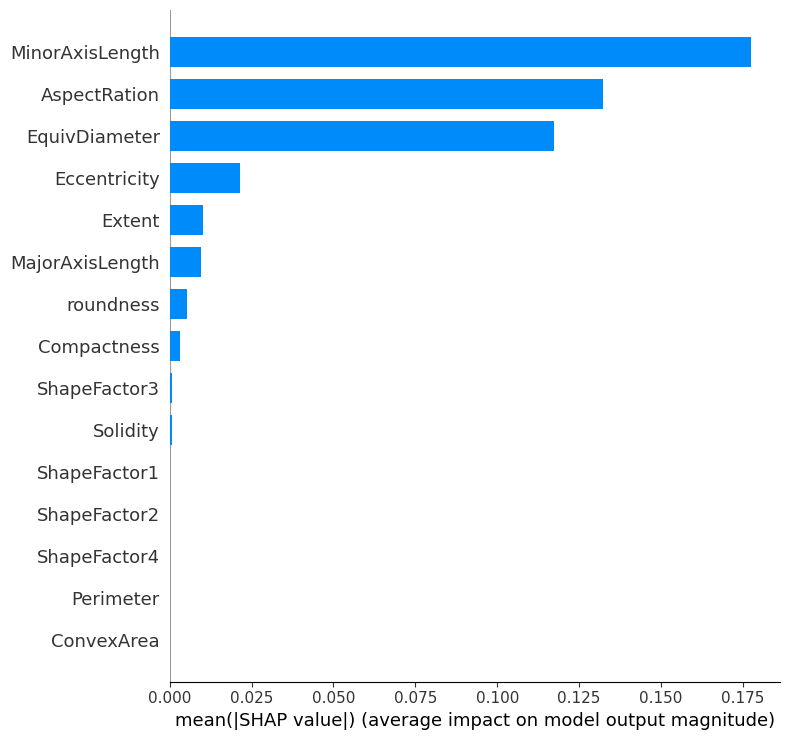

In [195]:
model = load_model('test_model\\test_mul_lstm.h5')
df = pd.read_csv("Dataset/test.csv",encoding="gbk")
x, y = df.iloc[:, 1:-1], df.iloc[:, -1]
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train = x_train.values.reshape((x_train.shape[0],x_train.shape[1],1))
x_test = x_test.values.reshape((x_test.shape[0], x_test.shape[1],1))
explainer = shap.GradientExplainer(model,x_train)
start = time.perf_counter()
shap_values = explainer.shap_values(x_test)
end = time.perf_counter()
print('Running time: %s Seconds'%(end-start))
shap_values_new = shap_values[0].squeeze(axis=-1)
x_test_new = x_test.squeeze(axis=-1)
column_names = df.columns[1:-1].tolist()
shap.summary_plot(shap_values_new,x_test_new,plot_type='bar',feature_names=column_names)

In [196]:
shap_test_mul_feature = np.abs(shap_values_new).mean(axis=0)
total = sum(shap_test_mul_feature)
shap_DB_lstm = [(x / total) * 100 for x in shap_test_mul_feature]

In [197]:
df = pd.read_csv("Dataset/test.csv",encoding="gbk")
column_names = df.columns[1:-1].tolist()
shap_DB_lstm_result = []
for i, name in enumerate(column_names):
    if shap_DB_lstm[i] < 0.15:
        shap_DB_lstm_result.append(name)
print(len(shap_DB_lstm_result))

6


In [198]:
df = pd.read_csv("Dataset/test.csv",encoding="gbk")
x, y = df.iloc[:, 1:-1], df.iloc[:, -1]
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
columns_to_drop = shap_DB_lstm_result
df_dropped = x.drop(columns=columns_to_drop)
x = df_dropped
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train = x_train.values.reshape((x_train.shape[0],x_train.shape[1],1))
x_test = x_test.values.reshape((x_test.shape[0], x_test.shape[1],1))
onehot = OneHotEncoder(sparse=False)
y_train = onehot.fit_transform(y_train.values.reshape(len(y_train), 1))
y_test = onehot.fit_transform(y_test.values.reshape(len(y_test), 1))
print(f'训练集的形状为：{x_train.shape}')

训练集的形状为：(19857, 9, 1)


In [199]:
inp=Input(shape=(x_train.shape[1:]))
lstm1=LSTM(units=32,activation='tanh',return_sequences=True)(inp)
l=Dropout(0.5)(lstm1)
l=LSTM(units=64,activation='tanh',return_sequences=True)(l)
l=Dropout(0.5)(l)
l=LSTM(units=128,activation='tanh',return_sequences=True)(l)
l=Dropout(0.5)(l)
d = Flatten()(l)
q = Dense(128)(d)
q = LeakyReLU(alpha=0.33)(q)
q = Dense(256, activation="tanh")(q)
output = Dense(7, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax')(q)
model = Model(inputs=inp,outputs=output)

In [200]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.001),  #优化器
              loss = 'categorical_crossentropy', #损失函数
              metrics = ['accuracy']
             )
lr_reduce=keras.callbacks.ReduceLROnPlateau('val_loss',patience=3,factor=0.5,min_lr=0.000001)
start = time.perf_counter()
history = model.fit(x_train,
                    y_train,
                    epochs=40,
                    callbacks = [lr_reduce],
                    batch_size= 32,
                    validation_data = (x_test,y_test),
                    shuffle=True)
end = time.perf_counter()

Epoch 1/40
621/621 [==============================] - 10s 12ms/step - loss: 1.5217 - accuracy: 0.3598 - val_loss: 0.5971 - val_accuracy: 0.7627
Epoch 2/40
621/621 [==============================] - 7s 11ms/step - loss: 0.5476 - accuracy: 0.7943 - val_loss: 0.3513 - val_accuracy: 0.8713
Epoch 3/40
621/621 [==============================] - 7s 11ms/step - loss: 0.4569 - accuracy: 0.8308 - val_loss: 0.3796 - val_accuracy: 0.8665
Epoch 4/40
621/621 [==============================] - 7s 11ms/step - loss: 0.4577 - accuracy: 0.8316 - val_loss: 0.3916 - val_accuracy: 0.8459
Epoch 5/40
621/621 [==============================] - 7s 11ms/step - loss: 0.4508 - accuracy: 0.8370 - val_loss: 0.4961 - val_accuracy: 0.8040
Epoch 6/40
621/621 [==============================] - 7s 11ms/step - loss: 0.3895 - accuracy: 0.8530 - val_loss: 0.3368 - val_accuracy: 0.8767
Epoch 7/40
621/621 [==============================] - 7s 11ms/step - loss: 0.3811 - accuracy: 0.8559 - val_loss: 0.3736 - val_accuracy: 0.855

In [201]:
print(model.evaluate(x_test,y_test))
print('Running time: %s Seconds'%(end-start))
Y_test = np.argmax(y_test, axis=1)
from sklearn.metrics import classification_report
predict = model.predict(x_test)
y_pred=np.argmax(predict,axis=1)
print(classification_report(Y_test, y_pred,digits=5))

156/156 [==============================] - 1s 4ms/step - loss: 0.3006 - accuracy: 0.8836
[0.3005579710006714, 0.8835850954055786]
Running time: 274.0499684000097 Seconds
              precision    recall  f1-score   support

           0    0.84105   0.73948   0.78700       737
           1    0.99854   1.00000   0.99927       686
           2    0.77022   0.84151   0.80429       713
           3    0.91027   0.86283   0.88592       729
           4    0.95382   0.93362   0.94361       708
           5    0.93249   0.95809   0.94512       692
           6    0.79762   0.86143   0.82830       700

    accuracy                        0.88359      4965
   macro avg    0.88629   0.88528   0.88479      4965
weighted avg    0.88551   0.88359   0.88353      4965



# -----------GRU---------------

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


Running time: 1010.6939856000004 Seconds


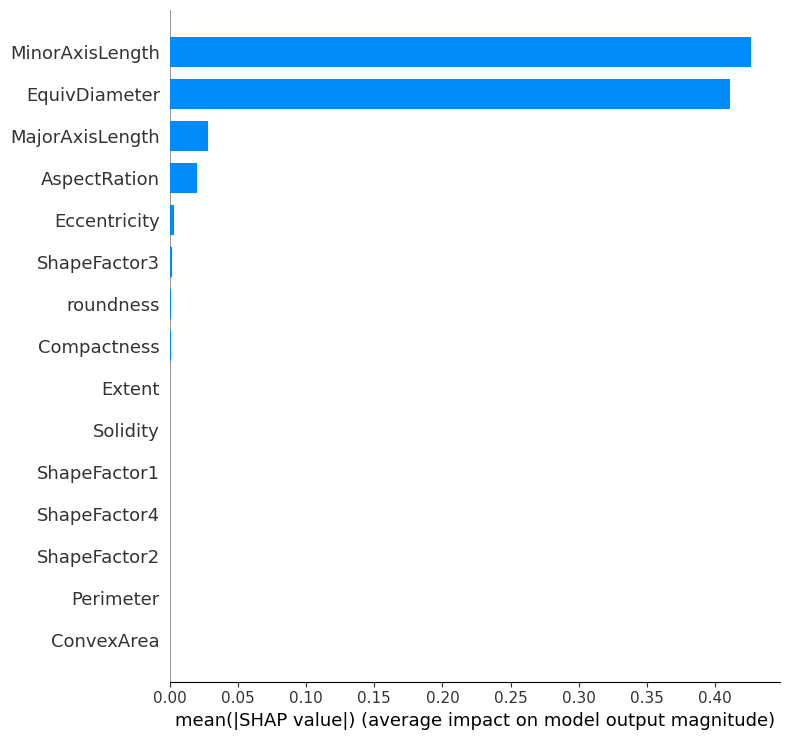

In [6]:
model = load_model('test_model\\test_mul_gru.h5')
df = pd.read_csv("Dataset/test.csv",encoding="gbk")
x, y = df.iloc[:, 1:-1], df.iloc[:, -1]
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train = x_train.values.reshape((x_train.shape[0],x_train.shape[1],1))
x_test = x_test.values.reshape((x_test.shape[0], x_test.shape[1],1))
explainer = shap.GradientExplainer(model,x_train)
start = time.perf_counter()
shap_values = explainer.shap_values(x_test)
end = time.perf_counter()
print('Running time: %s Seconds'%(end-start))
shap_values_new = shap_values[0].squeeze(axis=-1)
x_test_new = x_test.squeeze(axis=-1)
column_names = df.columns[1:-1].tolist()
shap.summary_plot(shap_values_new,x_test_new,plot_type='bar',feature_names=column_names)

In [7]:
shap_test_mul_feature = np.abs(shap_values_new).mean(axis=0)
total = sum(shap_test_mul_feature)
shap_DB_gru = [(x / total) * 100 for x in shap_test_mul_feature]

In [92]:
df = pd.read_csv("Dataset/test.csv",encoding="gbk")
column_names = df.columns[1:-1].tolist()
shap_DB_gru_result = []
for i, name in enumerate(column_names):
    if shap_DB_gru[i] < 0.15:
        shap_DB_gru_result.append(name)
print(len(shap_DB_gru_result))

9


In [93]:
df = pd.read_csv("Dataset/test.csv",encoding="gbk")
x, y = df.iloc[:, 1:-1], df.iloc[:, -1]
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
columns_to_drop = shap_DB_gru_result
df_dropped = x.drop(columns=columns_to_drop)
x = df_dropped
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train = x_train.values.reshape((x_train.shape[0],x_train.shape[1],1))
x_test = x_test.values.reshape((x_test.shape[0], x_test.shape[1],1))
onehot = OneHotEncoder(sparse=False)
y_train = onehot.fit_transform(y_train.values.reshape(len(y_train), 1))
y_test = onehot.fit_transform(y_test.values.reshape(len(y_test), 1))
print(f'训练集的形状为：{x_train.shape}')

训练集的形状为：(19857, 6, 1)


In [94]:
inp=Input(shape=(x_train.shape[1:]))
lstm1=GRU(units=32,activation='tanh',return_sequences=True)(inp)
l=Dropout(0.5)(lstm1)
l=GRU(units=64,activation='tanh',return_sequences=True)(l)
l=Dropout(0.5)(l)
l=GRU(units=128,activation='tanh',return_sequences=True)(l)
l=Dropout(0.5)(l)
d = Flatten()(l)
q = Dense(128)(d)
q = LeakyReLU(alpha=0.33)(q)
q = Dense(256, activation="tanh")(q)
output = Dense(7, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax')(q)
model = Model(inputs=inp,outputs=output)

In [95]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.001),  #优化器
              loss = 'categorical_crossentropy', #损失函数
              metrics = ['accuracy']
             )
lr_reduce=keras.callbacks.ReduceLROnPlateau('val_loss',patience=3,factor=0.5,min_lr=0.000001)
start = time.perf_counter()
history = model.fit(x_train,
                    y_train,
                    epochs=40,
                    callbacks = [lr_reduce],
                    batch_size= 32,
                    validation_data = (x_test,y_test),
                    shuffle=True)
end = time.perf_counter()

Epoch 1/40
621/621 [==============================] - 9s 11ms/step - loss: 1.5920 - accuracy: 0.3512 - val_loss: 0.4476 - val_accuracy: 0.8453
Epoch 2/40
621/621 [==============================] - 6s 9ms/step - loss: 0.5974 - accuracy: 0.7710 - val_loss: 0.3763 - val_accuracy: 0.8620
Epoch 3/40
621/621 [==============================] - 6s 9ms/step - loss: 0.5005 - accuracy: 0.8092 - val_loss: 0.4088 - val_accuracy: 0.8504
Epoch 4/40
621/621 [==============================] - 6s 9ms/step - loss: 0.4650 - accuracy: 0.8223 - val_loss: 0.3475 - val_accuracy: 0.8695
Epoch 5/40
621/621 [==============================] - 6s 9ms/step - loss: 0.4651 - accuracy: 0.8264 - val_loss: 0.3910 - val_accuracy: 0.8530
Epoch 6/40
621/621 [==============================] - 6s 9ms/step - loss: 0.4442 - accuracy: 0.8334 - val_loss: 0.4259 - val_accuracy: 0.8397
Epoch 7/40
621/621 [==============================] - 6s 9ms/step - loss: 0.4308 - accuracy: 0.8393 - val_loss: 0.4507 - val_accuracy: 0.8312
Epoch

In [96]:
print(model.evaluate(x_test,y_test))
print('Running time: %s Seconds'%(end-start))
Y_test = np.argmax(y_test, axis=1)
from sklearn.metrics import classification_report
predict = model.predict(x_test)
y_pred=np.argmax(predict,axis=1)
print(classification_report(Y_test, y_pred,digits=5))

156/156 [==============================] - 1s 4ms/step - loss: 0.3074 - accuracy: 0.8794
[0.307445764541626, 0.8793554902076721]
Running time: 235.95529879999958 Seconds
              precision    recall  f1-score   support

           0    0.83601   0.70556   0.76527       737
           1    0.99854   1.00000   0.99927       686
           2    0.74969   0.84432   0.79420       713
           3    0.91001   0.86008   0.88434       729
           4    0.95815   0.93785   0.94789       708
           5    0.93017   0.96243   0.94602       692
           6    0.79603   0.85857   0.82612       700

    accuracy                        0.87936      4965
   macro avg    0.88266   0.88126   0.88044      4965
weighted avg    0.88184   0.87936   0.87905      4965



# -------------CNN-LSTM-----------------

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


Running time: 1634.6127250000004 Seconds


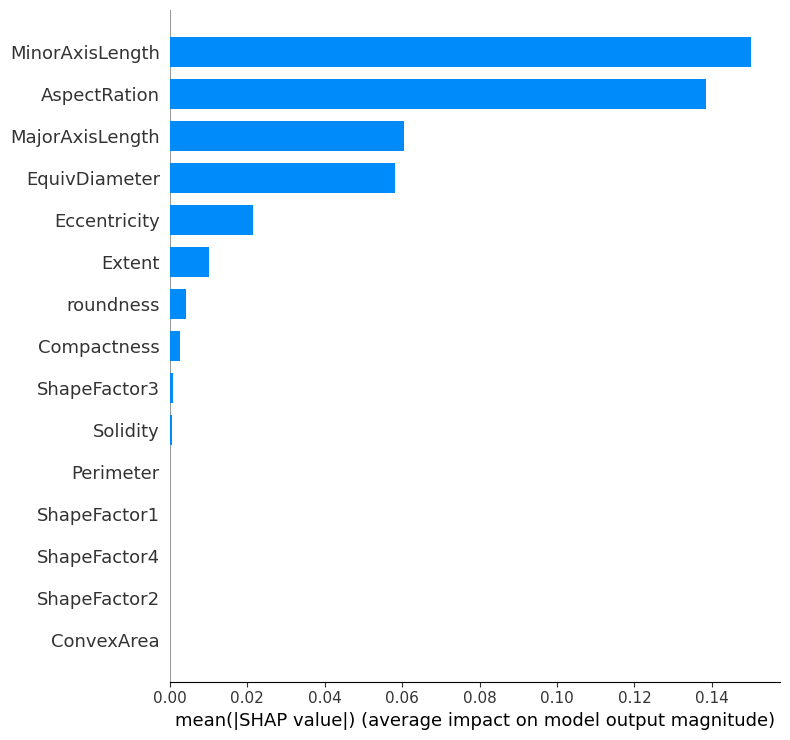

In [8]:
model = load_model('test_model\\test_mul_cnn_lstm.h5')#加载CNN模型
df = pd.read_csv("Dataset/test.csv",encoding="gbk")
x, y = df.iloc[:, 1:-1], df.iloc[:, -1]
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train = x_train.values.reshape((x_train.shape[0],x_train.shape[1],1))
x_test = x_test.values.reshape((x_test.shape[0], x_test.shape[1],1))
explainer = shap.GradientExplainer(model,x_train)
start = time.perf_counter()
shap_values = explainer.shap_values(x_test)
end = time.perf_counter()
print('Running time: %s Seconds'%(end-start))
shap_values_new = shap_values[0].squeeze(axis=-1)
x_test_new = x_test.squeeze(axis=-1)
column_names = df.columns[1:-1].tolist()
shap.summary_plot(shap_values_new,x_test_new,plot_type='bar',feature_names=column_names)

In [9]:
shap_test_mul_feature = np.abs(shap_values_new).mean(axis=0)
total = sum(shap_test_mul_feature)
shap_DB_cnn_lstm = [(x / total) * 100 for x in shap_test_mul_feature]

In [97]:
df = pd.read_csv("Dataset/test.csv",encoding="gbk")
column_names = df.columns[1:-1].tolist()
shap_DB_cnn_lstm_result = []
for i, name in enumerate(column_names):
    if shap_DB_cnn_lstm[i] < 0.15:
        shap_DB_cnn_lstm_result.append(name)
print(len(shap_DB_cnn_lstm_result))

6


In [98]:
df = pd.read_csv("Dataset/test.csv",encoding="gbk")
x, y = df.iloc[:, 1:-1], df.iloc[:, -1]
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
columns_to_drop = shap_DB_cnn_lstm_result
df_dropped = x.drop(columns=columns_to_drop)
x = df_dropped
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train = x_train.values.reshape((x_train.shape[0],x_train.shape[1],1))
x_test = x_test.values.reshape((x_test.shape[0], x_test.shape[1],1))
onehot = OneHotEncoder(sparse=False)
y_train = onehot.fit_transform(y_train.values.reshape(len(y_train), 1))
y_test = onehot.fit_transform(y_test.values.reshape(len(y_test), 1))
print(f'训练集的形状为：{x_train.shape}')

训练集的形状为：(19857, 9, 1)


In [99]:
inp=Input(shape=(x_train.shape[1:]))

x = Conv1D(32, 6, padding = "same", activation='tanh')(inp)
x = BatchNormalization()(x)
x = Conv1D(64, kernel_size=6, strides=1, padding='same',activation='relu')(x)
x = Conv1D(64, 6, strides=1, padding='same',activation='relu')(x)
x = LeakyReLU(alpha=0.33)(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Conv1D(128, kernel_size=6, strides=1, padding='same',activation='relu')(x)
x = Conv1D(128, 6, strides=1, padding='same',activation='relu')(x)
x = LeakyReLU(alpha=0.33)(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Conv1D(256, kernel_size=6, strides=1, padding='same',activation='relu')(x)
x = Conv1D(256, 6, strides=1, padding='same',activation='relu')(x)
x = LeakyReLU(alpha=0.33)(x)
x = Dropout(0.5)(x)
x = Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001))(x)
g = Flatten()(x)

lstm1=LSTM(units=32,activation='tanh',return_sequences=True)(inp)
l=Dropout(0.5)(lstm1)
l=LSTM(units=64,activation='tanh',return_sequences=True)(l)
l=Dropout(0.5)(l)
l=LSTM(units=128,activation='tanh',return_sequences=True)(l)
l=Dropout(0.5)(l)
d = Flatten()(l)

g2=concatenate([g,d],axis=1)
q = Dense(128)(g2)
q = LeakyReLU(alpha=0.33)(q)
q = Dense(256, activation="tanh")(q)
output = Dense(7, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax')(q)
model = Model(inputs=inp,outputs=output)

In [100]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.001),  #优化器
#               loss ='squared_hinge',
              loss = 'categorical_crossentropy', #损失函数
              metrics = ['accuracy']
             )

In [101]:
lr_reduce=keras.callbacks.ReduceLROnPlateau('val_loss',patience=3,factor=0.5,min_lr=0.000001)
start = time.perf_counter()
history = model.fit(x_train,
                    y_train,
                    epochs=40,
                    callbacks = [lr_reduce],
                    batch_size= 32,
                    validation_data = (x_test,y_test),
                    shuffle=True)
end = time.perf_counter()

Epoch 1/40
621/621 [==============================] - 18s 23ms/step - loss: 1.2579 - accuracy: 0.5603 - val_loss: 0.4643 - val_accuracy: 0.8381
Epoch 2/40
621/621 [==============================] - 13s 21ms/step - loss: 0.5630 - accuracy: 0.8072 - val_loss: 0.4226 - val_accuracy: 0.8514
Epoch 3/40
621/621 [==============================] - 13s 21ms/step - loss: 0.4812 - accuracy: 0.8253 - val_loss: 0.4272 - val_accuracy: 0.8437
Epoch 4/40
621/621 [==============================] - 13s 21ms/step - loss: 0.4539 - accuracy: 0.8344 - val_loss: 0.5410 - val_accuracy: 0.7992
Epoch 5/40
621/621 [==============================] - 13s 21ms/step - loss: 0.4564 - accuracy: 0.8353 - val_loss: 0.3701 - val_accuracy: 0.8610
Epoch 6/40
621/621 [==============================] - 13s 21ms/step - loss: 0.4317 - accuracy: 0.8419 - val_loss: 0.3960 - val_accuracy: 0.8550
Epoch 7/40
621/621 [==============================] - 13s 21ms/step - loss: 0.4284 - accuracy: 0.8489 - val_loss: 0.4678 - val_accuracy:

In [102]:
print(model.evaluate(x_test,y_test))
print('Running time: %s Seconds'%(end-start))
Y_test = np.argmax(y_test, axis=1)
from sklearn.metrics import classification_report
predict = model.predict(x_test)
y_pred=np.argmax(predict,axis=1)
print(classification_report(Y_test, y_pred,digits=5))

156/156 [==============================] - 1s 7ms/step - loss: 0.2082 - accuracy: 0.9235
[0.20824287831783295, 0.9234642386436462]
Running time: 533.710001600004 Seconds
              precision    recall  f1-score   support

           0    0.95601   0.88467   0.91896       737
           1    1.00000   1.00000   1.00000       686
           2    0.88021   0.94811   0.91290       713
           3    0.92932   0.84774   0.88666       729
           4    0.96647   0.93644   0.95122       708
           5    0.94957   0.95231   0.95094       692
           6    0.80485   0.90143   0.85040       700

    accuracy                        0.92346      4965
   macro avg    0.92663   0.92438   0.92444      4965
weighted avg    0.92657   0.92346   0.92393      4965



# -------------CNN-GRU-----------------

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


Running time: 1531.8600097999997 Seconds


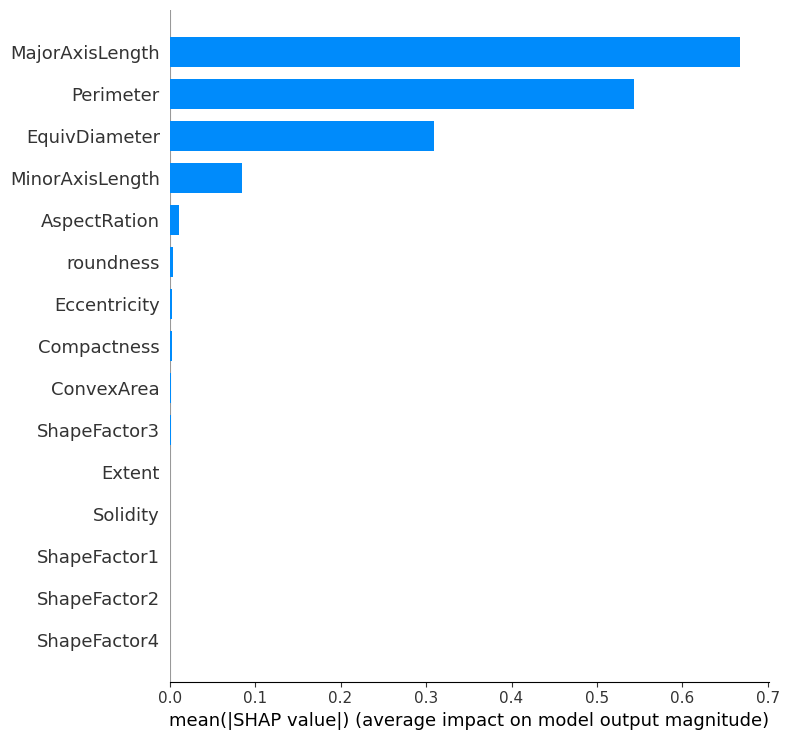

In [10]:
model = load_model('test_model\\test_mul_cnn_gru.h5')
df = pd.read_csv("Dataset/test.csv",encoding="gbk")
x, y = df.iloc[:, 1:-1], df.iloc[:, -1]
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train = x_train.values.reshape((x_train.shape[0],x_train.shape[1],1))
x_test = x_test.values.reshape((x_test.shape[0], x_test.shape[1],1))
explainer = shap.GradientExplainer(model,x_train)
start = time.perf_counter()
shap_values = explainer.shap_values(x_test)
end = time.perf_counter()
print('Running time: %s Seconds'%(end-start))
shap_values_new = shap_values[0].squeeze(axis=-1)
x_test_new = x_test.squeeze(axis=-1)
column_names = df.columns[1:-1].tolist()
shap.summary_plot(shap_values_new,x_test_new,plot_type='bar',feature_names=column_names)

In [11]:
shap_test_mul_feature = np.abs(shap_values_new).mean(axis=0)
total = sum(shap_test_mul_feature)
shap_DB_cnn_gru = [(x / total) * 100 for x in shap_test_mul_feature]

In [103]:
df = pd.read_csv("Dataset/test.csv",encoding="gbk")
column_names = df.columns[1:-1].tolist()
shap_DB_cnn_gru_result = []
for i, name in enumerate(column_names):
    if shap_DB_cnn_gru[i] < 0.15:
        shap_DB_cnn_gru_result.append(name)
print(len(shap_DB_cnn_gru_result))

8


In [104]:
df = pd.read_csv("Dataset/test.csv",encoding="gbk")
x, y = df.iloc[:, 1:-1], df.iloc[:, -1]
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
columns_to_drop = shap_DB_cnn_gru_result
df_dropped = x.drop(columns=columns_to_drop)
x = df_dropped
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train = x_train.values.reshape((x_train.shape[0],x_train.shape[1],1))
x_test = x_test.values.reshape((x_test.shape[0], x_test.shape[1],1))
onehot = OneHotEncoder(sparse=False)
y_train = onehot.fit_transform(y_train.values.reshape(len(y_train), 1))
y_test = onehot.fit_transform(y_test.values.reshape(len(y_test), 1))
print(f'训练集的形状为：{x_train.shape}')

训练集的形状为：(19857, 7, 1)


In [105]:
inp=Input(shape=(x_train.shape[1:]))

x = Conv1D(32, 6, padding = "same", activation='tanh')(inp)
x = BatchNormalization()(x)
x = Conv1D(64, kernel_size=6, strides=1, padding='same',activation='relu')(x)
x = Conv1D(64, 6, strides=1, padding='same',activation='relu')(x)
x = LeakyReLU(alpha=0.33)(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Conv1D(128, kernel_size=6, strides=1, padding='same',activation='relu')(x)
x = Conv1D(128, 6, strides=1, padding='same',activation='relu')(x)
x = LeakyReLU(alpha=0.33)(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Conv1D(256, kernel_size=6, strides=1, padding='same',activation='relu')(x)
x = Conv1D(256, 6, strides=1, padding='same',activation='relu')(x)
x = LeakyReLU(alpha=0.33)(x)
x = Dropout(0.5)(x)
x = Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001))(x)
g = Flatten()(x)

lstm1=GRU(units=32,activation='tanh',return_sequences=True)(inp)
l=Dropout(0.5)(lstm1)
l=GRU(units=64,activation='tanh',return_sequences=True)(l)
l=Dropout(0.5)(l)
l=GRU(units=128,activation='tanh',return_sequences=True)(l)
l=Dropout(0.5)(l)
d = Flatten()(l)

g2=concatenate([g,d],axis=1)
q = Dense(128)(g2)
q = LeakyReLU(alpha=0.33)(q)
q = Dense(256, activation="tanh")(q)
output = Dense(7, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax')(q)
model = Model(inputs=inp,outputs=output)

In [106]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.001),  #优化器
#               loss ='squared_hinge',
              loss = 'categorical_crossentropy', #损失函数
              metrics = ['accuracy']
             )

In [107]:
lr_reduce=keras.callbacks.ReduceLROnPlateau('val_loss',patience=3,factor=0.5,min_lr=0.000001)
start = time.perf_counter()
history = model.fit(x_train,
                    y_train,
                    epochs=40,
                    callbacks = [lr_reduce],
                    batch_size= 32,
                    validation_data = (x_test,y_test),
                    shuffle=True)
end = time.perf_counter()

Epoch 1/40
621/621 [==============================] - 18s 22ms/step - loss: 1.2735 - accuracy: 0.5552 - val_loss: 6.4338 - val_accuracy: 0.1388
Epoch 2/40
621/621 [==============================] - 13s 21ms/step - loss: 0.6642 - accuracy: 0.7763 - val_loss: 0.7195 - val_accuracy: 0.7400
Epoch 3/40
621/621 [==============================] - 13s 20ms/step - loss: 0.5707 - accuracy: 0.8040 - val_loss: 1.4551 - val_accuracy: 0.5229
Epoch 4/40
621/621 [==============================] - 12s 20ms/step - loss: 0.5570 - accuracy: 0.7974 - val_loss: 3.4088 - val_accuracy: 0.2856
Epoch 5/40
621/621 [==============================] - 13s 20ms/step - loss: 0.5204 - accuracy: 0.8171 - val_loss: 0.6594 - val_accuracy: 0.7774
Epoch 6/40
621/621 [==============================] - 13s 20ms/step - loss: 0.4588 - accuracy: 0.8325 - val_loss: 0.6226 - val_accuracy: 0.7641
Epoch 7/40
621/621 [==============================] - 12s 20ms/step - loss: 0.4601 - accuracy: 0.8341 - val_loss: 0.4635 - val_accuracy:

In [108]:
print(model.evaluate(x_test,y_test))
print('Running time: %s Seconds'%(end-start))
Y_test = np.argmax(y_test, axis=1)
from sklearn.metrics import classification_report
predict = model.predict(x_test)
y_pred=np.argmax(predict,axis=1)
print(classification_report(Y_test, y_pred,digits=5))

156/156 [==============================] - 1s 7ms/step - loss: 0.2414 - accuracy: 0.9152
[0.24143725633621216, 0.9152064323425293]
Running time: 507.30213010000443 Seconds
              precision    recall  f1-score   support

           0    0.94236   0.88738   0.91405       737
           1    0.99420   1.00000   0.99709       686
           2    0.86873   0.94670   0.90604       713
           3    0.96290   0.78326   0.86384       729
           4    0.96377   0.93927   0.95136       708
           5    0.93191   0.94942   0.94059       692
           6    0.77941   0.90857   0.83905       700

    accuracy                        0.91521      4965
   macro avg    0.92047   0.91637   0.91600      4965
weighted avg    0.92059   0.91521   0.91545      4965



# BM数据集

# SHAP方法

# ---------------CNN-------------

In [12]:
model = keras.models.load_model('test_model\cnn_model_rdl.h5')
df = pd.read_csv("Dataset\BM.csv",encoding="gbk")
x, y = df.iloc[:, 1:-1], df.iloc[:, -1]
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train = x_train.values.reshape((x_train.shape[0],x_train.shape[1],1))
x_test = x_test.values.reshape((x_test.shape[0], x_test.shape[1],1))

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


Running time: 1039.0929155000003 Seconds


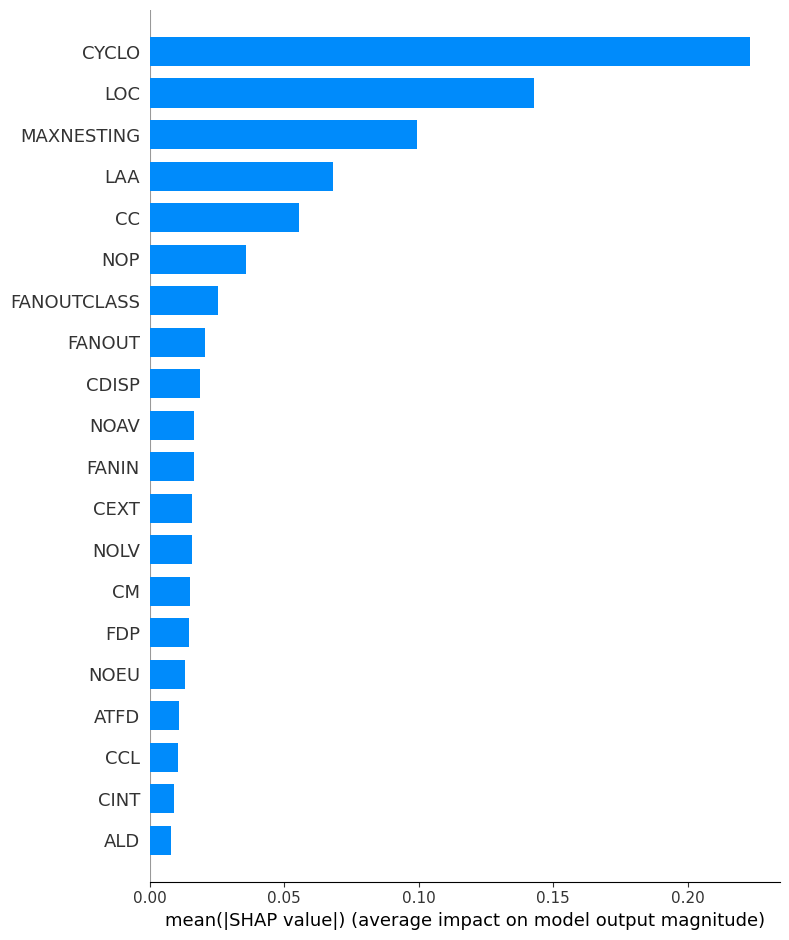

In [13]:
explainer = shap.GradientExplainer(model,x_train)
start = time.perf_counter()
shap_values = explainer.shap_values(x_test)
end = time.perf_counter()
print('Running time: %s Seconds'%(end-start))
shap_values_new = shap_values[0].squeeze(axis=-1)
x_test_new = x_test.squeeze(axis=-1)
column_names = df.columns[1:-1].tolist()
shap.summary_plot(shap_values_new,x_test_new,plot_type='bar',feature_names=column_names)

In [14]:
shap_test_mul_feature = np.abs(shap_values_new).mean(axis=0)
total = sum(shap_test_mul_feature)
shap_BM_cnn = [(x / total) * 100 for x in shap_test_mul_feature]

In [198]:
df = pd.read_csv("Dataset\BM.csv",encoding="gbk")
column_names = df.columns[1:-1].tolist()
shap_BM_cnn_result = []
for i, name in enumerate(column_names):
    if shap_BM_cnn[i] < 2:
        shap_BM_cnn_result.append(name)
print(len(shap_BM_cnn_result))

12


In [199]:
df = pd.read_csv("Dataset\BM.csv",encoding="gbk")
x, y = df.iloc[:, 1:-1], df.iloc[:, -1]
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
columns_to_drop = shap_BM_cnn_result
df_dropped = x.drop(columns=columns_to_drop)
x = df_dropped
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train = x_train.values.reshape((x_train.shape[0],x_train.shape[1],1))
x_test = x_test.values.reshape((x_test.shape[0], x_test.shape[1],1))
onehot = OneHotEncoder(sparse=False)
y_train = onehot.fit_transform(y_train.values.reshape(len(y_train), 1))
y_test = onehot.fit_transform(y_test.values.reshape(len(y_test), 1))
print(f'训练集的形状为：{x_train.shape}')

训练集的形状为：(121715, 9, 1)


In [200]:
inp=Input(shape=(x_train.shape[1:]))

x = Conv1D(32, 6, padding = "same", activation='tanh')(inp)
x = BatchNormalization()(x)
x = Conv1D(64, kernel_size=6, strides=1, padding='same',activation='relu')(x)
x = LeakyReLU(alpha=0.33)(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Conv1D(128, kernel_size=6, strides=1, padding='same',activation='relu')(x)
x = LeakyReLU(alpha=0.33)(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Conv1D(256, kernel_size=6, strides=1, padding='same',activation='relu')(x)
x = LeakyReLU(alpha=0.33)(x)
x = Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001))(x)
g = Flatten()(x)
output = Dense(2, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax')(g)

model = Model(inputs=inp,outputs=output)

In [201]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.001),  #优化器
              loss = 'categorical_crossentropy', #损失函数
              metrics = ['accuracy']
             )
lr_reduce=keras.callbacks.ReduceLROnPlateau('val_loss',patience=3,factor=0.5,min_lr=0.000001)

In [202]:
start = time.perf_counter()
history = model.fit(x_train,
                    y_train,
                    epochs=30,
                    callbacks = [lr_reduce],
                    batch_size= 32,
                    validation_data = (x_test,y_test),
                    shuffle=True)
end = time.perf_counter()

Epoch 1/30
3804/3804 [==============================] - 39s 10ms/step - loss: 0.3867 - accuracy: 0.8753 - val_loss: 0.2388 - val_accuracy: 0.9213
Epoch 2/30
3804/3804 [==============================] - 38s 10ms/step - loss: 0.2570 - accuracy: 0.9123 - val_loss: 0.2266 - val_accuracy: 0.9258
Epoch 3/30
3804/3804 [==============================] - 38s 10ms/step - loss: 0.2342 - accuracy: 0.9210 - val_loss: 0.2024 - val_accuracy: 0.9302
Epoch 4/30
3804/3804 [==============================] - 38s 10ms/step - loss: 0.2277 - accuracy: 0.9212 - val_loss: 0.2056 - val_accuracy: 0.9292
Epoch 5/30
3804/3804 [==============================] - 38s 10ms/step - loss: 0.2208 - accuracy: 0.9242 - val_loss: 0.2016 - val_accuracy: 0.9305
Epoch 6/30
3804/3804 [==============================] - 38s 10ms/step - loss: 0.2189 - accuracy: 0.9241 - val_loss: 0.1995 - val_accuracy: 0.9307
Epoch 7/30
3804/3804 [==============================] - 38s 10ms/step - loss: 0.2134 - accuracy: 0.9266 - val_loss: 0.2037 -

In [203]:
print(model.evaluate(x_test,y_test))
print('Running time: %s Seconds'%(end-start))
Y_test = np.argmax(y_test, axis=1)# Convert one-hot to index
from sklearn.metrics import classification_report
predict = model.predict(x_test)
y_pred=np.argmax(predict,axis=1)
print(classification_report(Y_test, y_pred,digits=5))

951/951 [==============================] - 4s 4ms/step - loss: 0.1867 - accuracy: 0.9340
[0.18673305213451385, 0.9340431690216064]
Running time: 1143.854732599997 Seconds
              precision    recall  f1-score   support

           0    0.95756   0.90805   0.93215     15182
           1    0.91292   0.95993   0.93584     15247

    accuracy                        0.93404     30429
   macro avg    0.93524   0.93399   0.93399     30429
weighted avg    0.93519   0.93404   0.93400     30429



In [188]:
df = pd.read_csv("Dataset\BM.csv",encoding="gbk")
column_names = df.columns[1:-1].tolist()
shap_BM_cnn_result = []
for i, name in enumerate(column_names):
    if shap_BM_cnn[i] < 2:
        shap_BM_cnn_result.append(name)
print(len(shap_BM_cnn_result))

12


In [189]:
df = pd.read_csv("Dataset\BM.csv",encoding="gbk")
x, y = df.iloc[:, 1:-1], df.iloc[:, -1]
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
columns_to_drop = shap_BM_cnn_result
df_dropped = x.drop(columns=columns_to_drop)
x = df_dropped
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train = x_train.values.reshape((x_train.shape[0],x_train.shape[1],1))
x_test = x_test.values.reshape((x_test.shape[0], x_test.shape[1],1))
onehot = OneHotEncoder(sparse=False)
y_train = onehot.fit_transform(y_train.values.reshape(len(y_train), 1))
y_test = onehot.fit_transform(y_test.values.reshape(len(y_test), 1))
print(f'训练集的形状为：{x_train.shape}')

训练集的形状为：(121715, 9, 1)


In [190]:
inp=Input(shape=(x_train.shape[1:]))

x = Conv1D(32, 6, padding = "same", activation='tanh')(inp)
x = BatchNormalization()(x)
x = Conv1D(64, kernel_size=6, strides=1, padding='same',activation='relu')(x)
x = LeakyReLU(alpha=0.33)(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Conv1D(128, kernel_size=6, strides=1, padding='same',activation='relu')(x)
x = LeakyReLU(alpha=0.33)(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Conv1D(256, kernel_size=6, strides=1, padding='same',activation='relu')(x)
x = LeakyReLU(alpha=0.33)(x)
x = Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001))(x)
g = Flatten()(x)
output = Dense(2, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax')(g)

model = Model(inputs=inp,outputs=output)

In [191]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.001),  #优化器
              loss = 'categorical_crossentropy', #损失函数
              metrics = ['accuracy']
             )
lr_reduce=keras.callbacks.ReduceLROnPlateau('val_loss',patience=3,factor=0.5,min_lr=0.000001)
start = time.perf_counter()
history = model.fit(x_train,
                    y_train,
                    epochs=30,
                    callbacks = [lr_reduce],
                    batch_size= 32,
                    validation_data = (x_test,y_test),
                    shuffle=True)
end = time.perf_counter()

Epoch 1/30
3804/3804 [==============================] - 39s 10ms/step - loss: 0.5973 - accuracy: 0.7286 - val_loss: 0.4128 - val_accuracy: 0.8323
Epoch 2/30
3804/3804 [==============================] - 38s 10ms/step - loss: 0.3726 - accuracy: 0.8532 - val_loss: 0.3262 - val_accuracy: 0.8965
Epoch 3/30
3804/3804 [==============================] - 38s 10ms/step - loss: 0.3470 - accuracy: 0.8676 - val_loss: 0.3229 - val_accuracy: 0.8967
Epoch 4/30
3804/3804 [==============================] - 38s 10ms/step - loss: 0.3342 - accuracy: 0.8754 - val_loss: 0.2966 - val_accuracy: 0.9034
Epoch 5/30
3804/3804 [==============================] - 37s 10ms/step - loss: 0.3199 - accuracy: 0.8829 - val_loss: 0.2725 - val_accuracy: 0.9138
Epoch 6/30
3804/3804 [==============================] - 38s 10ms/step - loss: 0.3146 - accuracy: 0.8845 - val_loss: 0.2657 - val_accuracy: 0.9127
Epoch 7/30
3804/3804 [==============================] - 39s 10ms/step - loss: 0.3082 - accuracy: 0.8891 - val_loss: 0.2587 -

In [192]:
print(model.evaluate(x_test,y_test))
print('Running time: %s Seconds'%(end-start))
Y_test = np.argmax(y_test, axis=1)
from sklearn.metrics import classification_report
predict = model.predict(x_test)
y_pred=np.argmax(predict,axis=1)
print(classification_report(Y_test, y_pred,digits=5))

951/951 [==============================] - 4s 4ms/step - loss: 0.2250 - accuracy: 0.9278
[0.2249610871076584, 0.9278320074081421]
Running time: 1134.1000863999943 Seconds
              precision    recall  f1-score   support

           0    0.94406   0.90923   0.92632     15182
           1    0.91282   0.94635   0.92928     15247

    accuracy                        0.92783     30429
   macro avg    0.92844   0.92779   0.92780     30429
weighted avg    0.92841   0.92783   0.92780     30429



# ---------------LSTM-------------

In [15]:
model = load_model('test_model\BM_new_LSTM.h5')
df = pd.read_csv("Dataset\BM.csv",encoding="gbk")
x, y = df.iloc[:, 1:-1], df.iloc[:, -1]
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train = x_train.values.reshape((x_train.shape[0],x_train.shape[1],1))
x_test = x_test.values.reshape((x_test.shape[0], x_test.shape[1],1))

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


Running time: 865.1065972000006 Seconds


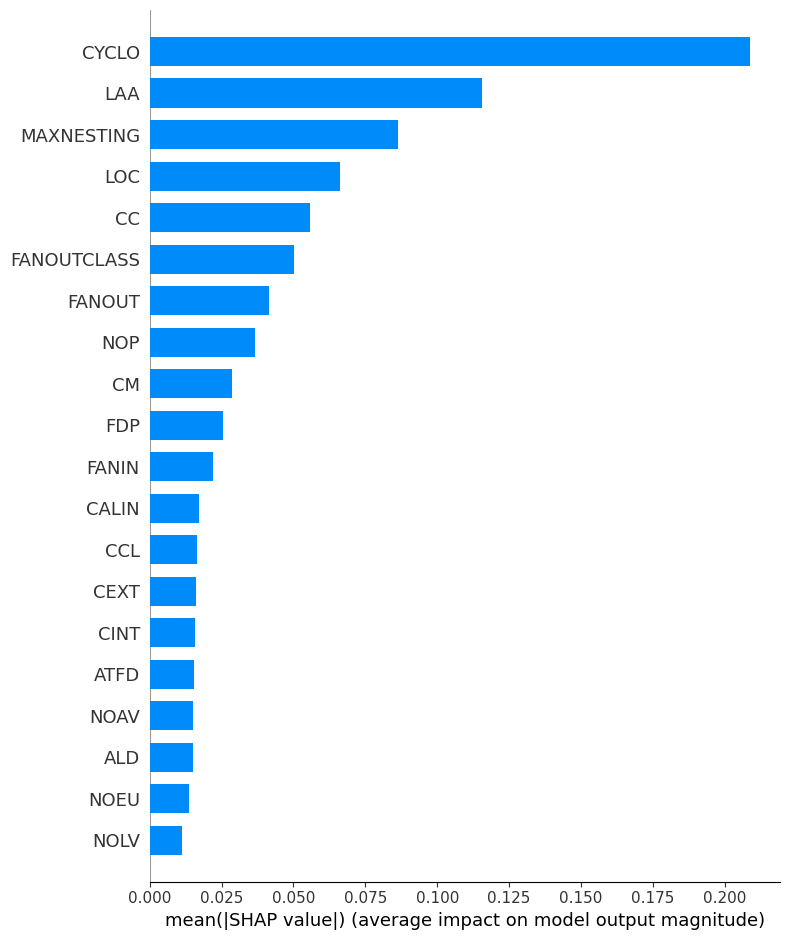

In [16]:
explainer = shap.GradientExplainer(model,x_train)
start = time.perf_counter()
shap_values = explainer.shap_values(x_test)
end = time.perf_counter()
print('Running time: %s Seconds'%(end-start))
shap_values_new = shap_values[0].squeeze(axis=-1)
x_test_new = x_test.squeeze(axis=-1)
column_names = df.columns[1:-1].tolist()
shap.summary_plot(shap_values_new,x_test_new,plot_type='bar',feature_names=column_names)

In [17]:
shap_test_mul_feature = np.abs(shap_values_new).mean(axis=0)
total = sum(shap_test_mul_feature)
shap_BM_lstm = [(x / total) * 100 for x in shap_test_mul_feature]

In [130]:
df = pd.read_csv("Dataset\BM.csv",encoding="gbk")
column_names = df.columns[1:-1].tolist()
shap_BM_lstm_result = []
for i, name in enumerate(column_names):
    if shap_BM_lstm[i] < 1.9:
        shap_BM_lstm_result.append(name)
print(len(shap_BM_lstm_result))

9


In [131]:
df = pd.read_csv("Dataset\BM.csv",encoding="gbk")
x, y = df.iloc[:, 1:-1], df.iloc[:,-1]
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
columns_to_drop = shap_BM_lstm_result
df_dropped = x.drop(columns=columns_to_drop)
x = df_dropped
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train = x_train.values.reshape((x_train.shape[0],x_train.shape[1],1))
x_test = x_test.values.reshape((x_test.shape[0], x_test.shape[1],1))
onehot = OneHotEncoder(sparse=False)
y_train = onehot.fit_transform(y_train.values.reshape(len(y_train), 1))
y_test = onehot.fit_transform(y_test.values.reshape(len(y_test), 1))
print(f'训练集的形状为：{x_train.shape}')

训练集的形状为：(121715, 12, 1)


In [132]:
inp=Input(shape=(x_train.shape[1:]))
lstm1=LSTM(units=32,activation='tanh',return_sequences=True)(inp)
l=Dropout(0.5)(lstm1)
l=Dense(64,activation="relu")(l)
l=Dropout(0.5)(l)
l=Dense(128,activation="relu")(l)
l=Dropout(0.5)(l)
d = Flatten()(l)
output = Dense(2, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax')(d)
model = Model(inputs=inp,outputs=output)

In [133]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.001),  #优化器
              loss = 'categorical_crossentropy', #损失函数
              metrics = ['accuracy']
             )
lr_reduce=keras.callbacks.ReduceLROnPlateau('val_loss',patience=3,factor=0.5,min_lr=0.000001)
start = time.perf_counter()
history = model.fit(x_train,
                    y_train,
                    epochs=30,
                    callbacks = [lr_reduce],
                    batch_size= 32,
                    validation_data = (x_test,y_test),
                    shuffle=True)
end = time.perf_counter()

Epoch 1/30
3804/3804 [==============================] - 26s 7ms/step - loss: 0.3960 - accuracy: 0.8431 - val_loss: 0.2657 - val_accuracy: 0.9095
Epoch 2/30
3804/3804 [==============================] - 24s 6ms/step - loss: 0.2876 - accuracy: 0.9024 - val_loss: 0.2442 - val_accuracy: 0.9168
Epoch 3/30
3804/3804 [==============================] - 24s 6ms/step - loss: 0.2524 - accuracy: 0.9151 - val_loss: 0.2156 - val_accuracy: 0.9265
Epoch 4/30
3804/3804 [==============================] - 24s 6ms/step - loss: 0.2319 - accuracy: 0.9228 - val_loss: 0.2030 - val_accuracy: 0.9301
Epoch 5/30
3804/3804 [==============================] - 24s 6ms/step - loss: 0.2248 - accuracy: 0.9252 - val_loss: 0.1974 - val_accuracy: 0.9316
Epoch 6/30
3804/3804 [==============================] - 24s 6ms/step - loss: 0.2134 - accuracy: 0.9284 - val_loss: 0.1972 - val_accuracy: 0.9324
Epoch 7/30
3804/3804 [==============================] - 24s 6ms/step - loss: 0.2105 - accuracy: 0.9283 - val_loss: 0.1957 - val_ac

In [134]:
print('Running time: %s Seconds'%(end-start))
print(model.evaluate(x_test,y_test))
Y_test = np.argmax(y_test, axis=1)
from sklearn.metrics import classification_report
predict = model.predict(x_test)
y_pred=np.argmax(predict,axis=1)
print(classification_report(Y_test, y_pred,digits=5))

Running time: 735.6791448000004 Seconds
951/951 [==============================] - 3s 3ms/step - loss: 0.1740 - accuracy: 0.9371
[0.17400382459163666, 0.9370666146278381]
              precision    recall  f1-score   support

           0    0.97271   0.89909   0.93445     15182
           1    0.90656   0.97488   0.93948     15247

    accuracy                        0.93707     30429
   macro avg    0.93963   0.93699   0.93697     30429
weighted avg    0.93956   0.93707   0.93697     30429



# ---------------GRU-------------

In [18]:
model = load_model('test_model\BM_new_GRU.h5')#加载CNN模型
df = pd.read_csv("Dataset\BM.csv",encoding="gbk")
x, y = df.iloc[:, 1:-1], df.iloc[:, -1]
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train = x_train.values.reshape((x_train.shape[0],x_train.shape[1],1))
x_test = x_test.values.reshape((x_test.shape[0], x_test.shape[1],1))

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


Running time: 832.3353118999985 Seconds


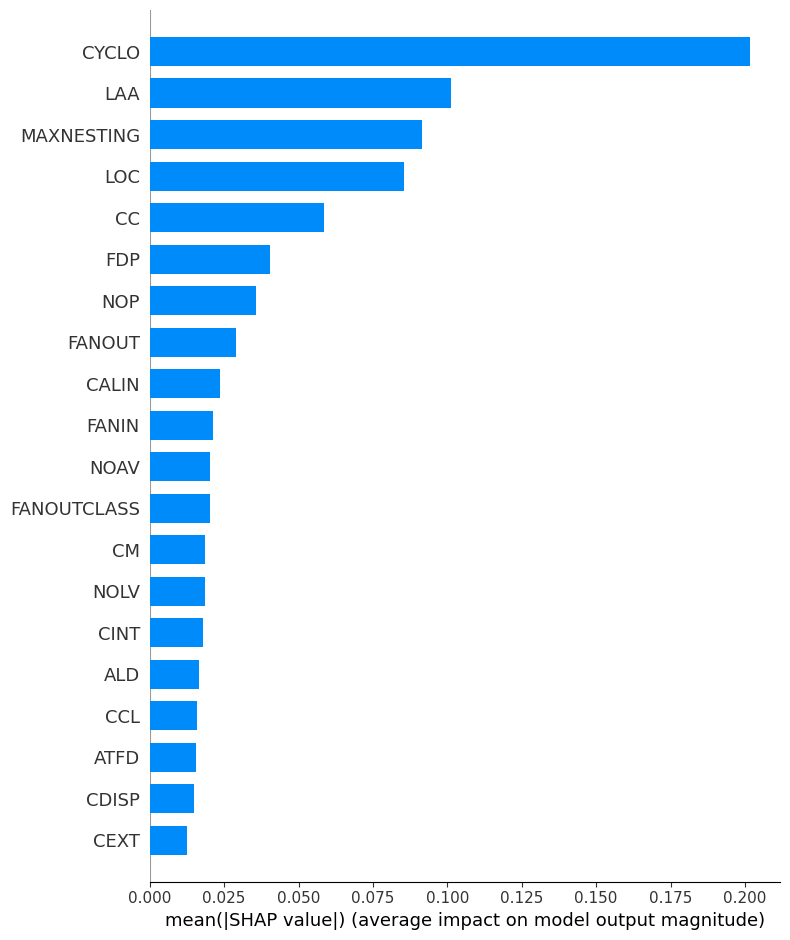

In [19]:
explainer = shap.GradientExplainer(model,x_train)
start = time.perf_counter()
shap_values = explainer.shap_values(x_test)
end = time.perf_counter()
print('Running time: %s Seconds'%(end-start))
shap_values_new = shap_values[0].squeeze(axis=-1)
x_test_new = x_test.squeeze(axis=-1)
column_names = df.columns[1:-1].tolist()
shap.summary_plot(shap_values_new,x_test_new,plot_type='bar',feature_names=column_names)

In [20]:
shap_test_mul_feature = np.abs(shap_values_new).mean(axis=0)
total = sum(shap_test_mul_feature)
shap_BM_gru = [(x / total) * 100 for x in shap_test_mul_feature]

In [120]:
df = pd.read_csv("Dataset\BM.csv",encoding="gbk")
column_names = df.columns[1:-1].tolist()
shap_BM_gru_result = []
for i, name in enumerate(column_names):
    if shap_BM_gru[i] < 1.9:
        shap_BM_gru_result.append(name)
print(len(shap_BM_gru_result))

6


In [121]:
df = pd.read_csv("Dataset\BM.csv",encoding="gbk")
x, y = df.iloc[:, 1:-1], df.iloc[:,-1]
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
columns_to_drop = shap_BM_gru_result
df_dropped = x.drop(columns=columns_to_drop)
x = df_dropped
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train = x_train.values.reshape((x_train.shape[0],x_train.shape[1],1))
x_test = x_test.values.reshape((x_test.shape[0], x_test.shape[1],1))
onehot = OneHotEncoder(sparse=False)
y_train = onehot.fit_transform(y_train.values.reshape(len(y_train), 1))
y_test = onehot.fit_transform(y_test.values.reshape(len(y_test), 1))
print(f'训练集的形状为：{x_train.shape}')

训练集的形状为：(121715, 15, 1)


In [122]:
inp=Input(shape=(x_train.shape[1:]))
lstm1=GRU(units=32,activation='tanh',return_sequences=True)(inp)
l=Dropout(0.5)(lstm1)
l=Dense(64,activation="relu")(l)
l=Dropout(0.5)(l)
l=Dense(128,activation="relu")(l)
l=Dropout(0.5)(l)
d = Flatten()(l)
output = Dense(2, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax')(d)
model = Model(inputs=inp,outputs=output)

In [123]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.001),  #优化器
              loss = 'categorical_crossentropy', #损失函数
              metrics = ['accuracy']
             )
lr_reduce=keras.callbacks.ReduceLROnPlateau('val_loss',patience=3,factor=0.5,min_lr=0.000001)
import time
start = time.perf_counter()
history = model.fit(x_train,
                    y_train,
                    epochs=30,
                    callbacks = [lr_reduce],
                    batch_size= 32,
                    validation_data = (x_test,y_test),
                    shuffle=True)
end = time.perf_counter()

Epoch 1/30
3804/3804 [==============================] - 27s 7ms/step - loss: 0.3862 - accuracy: 0.8565 - val_loss: 0.2529 - val_accuracy: 0.9160
Epoch 2/30
3804/3804 [==============================] - 26s 7ms/step - loss: 0.2658 - accuracy: 0.9129 - val_loss: 0.2238 - val_accuracy: 0.9275
Epoch 3/30
3804/3804 [==============================] - 25s 7ms/step - loss: 0.2485 - accuracy: 0.9202 - val_loss: 0.2276 - val_accuracy: 0.9239
Epoch 4/30
3804/3804 [==============================] - 25s 7ms/step - loss: 0.2376 - accuracy: 0.9222 - val_loss: 0.2074 - val_accuracy: 0.9310
Epoch 5/30
3804/3804 [==============================] - 24s 6ms/step - loss: 0.2283 - accuracy: 0.9263 - val_loss: 0.2023 - val_accuracy: 0.9320
Epoch 6/30
3804/3804 [==============================] - 24s 6ms/step - loss: 0.2202 - accuracy: 0.9275 - val_loss: 0.1973 - val_accuracy: 0.9327
Epoch 7/30
3804/3804 [==============================] - 24s 6ms/step - loss: 0.2164 - accuracy: 0.9279 - val_loss: 0.2051 - val_ac

In [124]:
print('Running time: %s Seconds'%(end-start))
print(model.evaluate(x_test,y_test))
Y_test = np.argmax(y_test, axis=1)
from sklearn.metrics import classification_report
predict = model.predict(x_test)
y_pred=np.argmax(predict,axis=1)
print(classification_report(Y_test, y_pred,digits=5))

Running time: 742.533308099999 Seconds
951/951 [==============================] - 3s 3ms/step - loss: 0.1712 - accuracy: 0.9381
[0.17115727066993713, 0.9381182193756104]
              precision    recall  f1-score   support

           0    0.97547   0.89856   0.93544     15182
           1    0.90635   0.97750   0.94058     15247

    accuracy                        0.93812     30429
   macro avg    0.94091   0.93803   0.93801     30429
weighted avg    0.94084   0.93812   0.93802     30429



# -----------------LIME方法------------------

# CNN

In [64]:
def collect_lime_explanations(sample_num,explainer, num_samples):
    explanations = []
    random_indices = random.sample(range(sample_num), num_samples)
    start = time.perf_counter()
    for idx in random_indices:
        df = pd.read_csv("Dataset\\test.csv",encoding="gbk")
        x, y = df.iloc[idx:idx+1, 1:-1], df.iloc[idx:idx+1, -1]
        df = x.transpose()
        df.columns = ['Value']
        series = df['Value']
        exp = explainer.explain_instance(data_row=series,
                                          predict_fn=model.predict,
                                          num_features=len(column_names))
        explanations.append(exp.as_map())
    end = time.perf_counter()
    print('Running time: %s Seconds'%(end-start))
    return explanations

In [65]:
model = load_model('test_model\\test_mul.h5')#加载CNN模型
df = pd.read_csv("Dataset\\test.csv",encoding="gbk")
column_names = df.columns[1:-1].tolist()
x, y = df.iloc[:, 1:-1], df.iloc[:, -1]
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [66]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train), # 训练集特征，必须是 numpy 的 Array
    feature_names=column_names, # 特征列名
    class_names=[ '0', '1','2', '3', '4', '5'], # 预测类别名称
    mode='classification' # 分类模式
)

In [67]:
samples_num = 13600
num_samples = 700  # 你可以选择更多的样本
explanations = collect_lime_explanations(samples_num, explainer, num_samples)

Running time: 514.9276405000019 Seconds


In [68]:
weights_sum = {}
for exp_map in explanations:
    for feature, weights in exp_map.items():
        for feature_idx, weight in weights:
                # 如果特征索引不在weights_sum中，则初始化为0
            if feature_idx not in weights_sum:
                weights_sum[feature_idx] = 0
                # 将权重加到特征索引的总权重中
            weights_sum[feature_idx] += weight
average_weights = {feature: weight / num_samples for feature, weight in weights_sum.items()}
sorted_features = sorted(average_weights.items(), key=lambda x: abs(x[1]), reverse=True)
sorted_tuples = sorted(sorted_features, key=lambda x: x[0])
sorted_weights = [weight for _, weight in sorted_tuples]
sorted_weights_new = [abs(weight) for weight in sorted_weights]
total_sum = sum(sorted_weights_new)
LIME_test_cnn = [(weight / total_sum) * 100 for weight in sorted_weights_new]

In [82]:
df = pd.read_csv("Dataset\\test.csv",encoding="gbk")
column_names = df.columns[1:-1].tolist()
LIME_test_cnn_result = []
for i, name in enumerate(column_names):
    if LIME_test_cnn[i] < 0.7:
        LIME_test_cnn_result.append(name)
print(len(LIME_test_cnn_result))

5


In [83]:
df = pd.read_csv("Dataset/test.csv",encoding="gbk")
x, y = df.iloc[:, 1:-1], df.iloc[:, -1]
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
columns_to_drop = LIME_test_cnn_result
df_dropped = x.drop(columns=columns_to_drop)
x = df_dropped
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train = x_train.values.reshape((x_train.shape[0],x_train.shape[1],1))
x_test = x_test.values.reshape((x_test.shape[0], x_test.shape[1],1))
onehot = OneHotEncoder(sparse=False)
y_train = onehot.fit_transform(y_train.values.reshape(len(y_train), 1))
y_test = onehot.fit_transform(y_test.values.reshape(len(y_test), 1))
print(f'训练集的形状为：{x_train.shape}')

训练集的形状为：(19857, 10, 1)


In [84]:
inp=Input(shape=(x_train.shape[1:]))
x = Conv1D(32, 6, padding="same", activation='tanh')(inp)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Conv1D(64, kernel_size=6, strides=1, padding='same', activation='relu')(x)
x = Conv1D(64, 6, strides=1, padding='same', activation='relu')(x)
x = LeakyReLU(alpha=0.33)(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Conv1D(128, kernel_size=6, strides=1, padding='same', activation='relu')(x)
x = Conv1D(128, 6, strides=1, padding='same', activation='relu')(x)
x = LeakyReLU(alpha=0.33)(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Conv1D(256, kernel_size=6, strides=1, padding='same', activation='relu')(x)
x = Conv1D(256, 6, strides=1, padding='same', activation='relu')(x)
x = LeakyReLU(alpha=0.33)(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = Flatten()(x)
output = Dense(7, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='softmax')(x)
model = Model(inputs=inp,outputs=output)

In [85]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.001),  #优化器
              loss = 'categorical_crossentropy', #损失函数
              metrics = ['accuracy']
             )
lr_reduce=keras.callbacks.ReduceLROnPlateau('val_loss',patience=3,factor=0.5,min_lr=0.000001)
start = time.perf_counter()
history = model.fit(x_train,
                    y_train,
                    epochs=40,
                    callbacks = [lr_reduce],
                    batch_size= 32,
                    validation_data = (x_test,y_test),
                    shuffle=True)
end = time.perf_counter()

Epoch 1/40
621/621 [==============================] - 10s 14ms/step - loss: 2.6224 - accuracy: 0.1385 - val_loss: 2.2593 - val_accuracy: 0.1394
Epoch 2/40
621/621 [==============================] - 9s 14ms/step - loss: 1.9653 - accuracy: 0.2806 - val_loss: 1.4756 - val_accuracy: 0.4636
Epoch 3/40
621/621 [==============================] - 9s 14ms/step - loss: 1.5019 - accuracy: 0.4332 - val_loss: 1.3080 - val_accuracy: 0.4836
Epoch 4/40
621/621 [==============================] - 9s 14ms/step - loss: 1.3989 - accuracy: 0.4493 - val_loss: 1.8409 - val_accuracy: 0.2898
Epoch 5/40
621/621 [==============================] - 9s 15ms/step - loss: 1.3557 - accuracy: 0.4551 - val_loss: 1.2221 - val_accuracy: 0.5116
Epoch 6/40
621/621 [==============================] - 9s 14ms/step - loss: 1.3265 - accuracy: 0.4614 - val_loss: 1.2128 - val_accuracy: 0.5005
Epoch 7/40
621/621 [==============================] - 9s 15ms/step - loss: 1.3245 - accuracy: 0.4600 - val_loss: 1.2320 - val_accuracy: 0.496

In [86]:
print(model.evaluate(x_test,y_test))
print('Running time: %s Seconds'%(end-start))
Y_test = np.argmax(y_test, axis=1)
from sklearn.metrics import classification_report
predict = model.predict(x_test)
y_pred=np.argmax(predict,axis=1)
print(classification_report(Y_test, y_pred,digits=5))

156/156 [==============================] - 1s 5ms/step - loss: 1.3094 - accuracy: 0.4683
[1.3093969821929932, 0.4682779312133789]
Running time: 347.5947617999991 Seconds
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000       737
           1    0.33578   0.33382   0.33480       686
           2    0.54313   0.47686   0.50784       713
           3    0.30033   0.49931   0.37506       729
           4    0.92401   0.75565   0.83139       708
           5    0.70819   0.91185   0.79722       692
           6    0.23179   0.32286   0.26985       700

    accuracy                        0.46828      4965
   macro avg    0.43475   0.47148   0.44517      4965
weighted avg    0.43163   0.46828   0.44197      4965



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


# LSTM

In [202]:
model = load_model('test_model\\test_mul_lstm.h5')
df = pd.read_csv("Dataset\\test.csv",encoding="gbk")
column_names = df.columns[1:-1].tolist()
x, y = df.iloc[:, 1:-1], df.iloc[:, -1]
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape)

(19857, 15)


In [203]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train), # 训练集特征，必须是 numpy 的 Array
    feature_names=column_names, # 特征列名
    class_names=[ '0', '1','2', '3', '4', '5'], # 预测类别名称
    mode='classification' # 分类模式
)

In [204]:
samples_num = 13600
num_samples = 700  # 你可以选择更多的样本
explanations = collect_lime_explanations(samples_num, explainer, num_samples)

Running time: 445.76987139999983 Seconds


In [205]:
weights_sum = {}
for exp_map in explanations:
    for feature, weights in exp_map.items():
        for feature_idx, weight in weights:
                # 如果特征索引不在weights_sum中，则初始化为0
            if feature_idx not in weights_sum:
                weights_sum[feature_idx] = 0
                # 将权重加到特征索引的总权重中
            weights_sum[feature_idx] += weight
average_weights = {feature: weight / num_samples for feature, weight in weights_sum.items()}
sorted_features = sorted(average_weights.items(), key=lambda x: abs(x[1]), reverse=True)
sorted_tuples = sorted(sorted_features, key=lambda x: x[0])
sorted_weights = [weight for _, weight in sorted_tuples]
sorted_weights_new = [abs(weight) for weight in sorted_weights]
total_sum = sum(sorted_weights_new)
LIME_test_lstm = [(weight / total_sum) * 100 for weight in sorted_weights_new]

In [259]:
df = pd.read_csv("Dataset\\test.csv",encoding="gbk")
column_names = df.columns[1:-1].tolist()
LIME_test_lstm_result = []
for i, name in enumerate(column_names):
    if LIME_test_lstm[i] < 0.3:
        LIME_test_lstm_result.append(name)
print(len(LIME_test_lstm_result))

9


In [260]:
df = pd.read_csv("Dataset/test.csv",encoding="gbk")
x, y = df.iloc[:, 1:-1], df.iloc[:, -1]
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
columns_to_drop = LIME_test_lstm_result
df_dropped = x.drop(columns=columns_to_drop)
x = df_dropped
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train = x_train.values.reshape((x_train.shape[0],x_train.shape[1],1))
x_test = x_test.values.reshape((x_test.shape[0], x_test.shape[1],1))
onehot = OneHotEncoder(sparse=False)
y_train = onehot.fit_transform(y_train.values.reshape(len(y_train), 1))
y_test = onehot.fit_transform(y_test.values.reshape(len(y_test), 1))
print(f'训练集的形状为：{x_train.shape}')

训练集的形状为：(19857, 6, 1)


In [261]:
inp=Input(shape=(x_train.shape[1:]))
lstm1=LSTM(units=32,activation='tanh',return_sequences=True)(inp)
l=Dropout(0.5)(lstm1)
l=LSTM(units=64,activation='tanh',return_sequences=True)(l)
l=Dropout(0.5)(l)
l=LSTM(units=128,activation='tanh',return_sequences=True)(l)
l=Dropout(0.5)(l)
d = Flatten()(l)
q = Dense(128)(d)
q = LeakyReLU(alpha=0.33)(q)
q = Dense(256, activation="tanh")(q)
output = Dense(7, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax')(q)
model = Model(inputs=inp,outputs=output)

In [262]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.001),  #优化器
              loss = 'categorical_crossentropy', #损失函数
              metrics = ['accuracy']
             )
lr_reduce=keras.callbacks.ReduceLROnPlateau('val_loss',patience=3,factor=0.5,min_lr=0.000001)
start = time.perf_counter()
history = model.fit(x_train,
                    y_train,
                    epochs=40,
                    callbacks = [lr_reduce],
                    batch_size= 32,
                    validation_data = (x_test,y_test),
                    shuffle=True)
end = time.perf_counter()

Epoch 1/40
621/621 [==============================] - 11s 12ms/step - loss: 1.6343 - accuracy: 0.3117 - val_loss: 0.8900 - val_accuracy: 0.5569
Epoch 2/40
621/621 [==============================] - 7s 11ms/step - loss: 0.9575 - accuracy: 0.5591 - val_loss: 0.7954 - val_accuracy: 0.6373
Epoch 3/40
621/621 [==============================] - 6s 10ms/step - loss: 0.8678 - accuracy: 0.6202 - val_loss: 0.5732 - val_accuracy: 0.7952
Epoch 4/40
621/621 [==============================] - 7s 11ms/step - loss: 0.7490 - accuracy: 0.6870 - val_loss: 0.4664 - val_accuracy: 0.8272
Epoch 5/40
621/621 [==============================] - 7s 11ms/step - loss: 0.6189 - accuracy: 0.7543 - val_loss: 0.3506 - val_accuracy: 0.8689
Epoch 6/40
621/621 [==============================] - 7s 11ms/step - loss: 0.5005 - accuracy: 0.8061 - val_loss: 0.3742 - val_accuracy: 0.8469
Epoch 7/40
621/621 [==============================] - 7s 11ms/step - loss: 0.4803 - accuracy: 0.8133 - val_loss: 0.3730 - val_accuracy: 0.847

In [263]:
print(model.evaluate(x_test,y_test))
print('Running time: %s Seconds'%(end-start))
Y_test = np.argmax(y_test, axis=1)
from sklearn.metrics import classification_report
predict = model.predict(x_test)
y_pred=np.argmax(predict,axis=1)
print(classification_report(Y_test, y_pred,digits=5))

156/156 [==============================] - 1s 4ms/step - loss: 0.3092 - accuracy: 0.8767
[0.30923035740852356, 0.8767371773719788]
Running time: 267.86036979999335 Seconds
              precision    recall  f1-score   support

           0    0.79556   0.72863   0.76062       737
           1    1.00000   1.00000   1.00000       686
           2    0.75133   0.79243   0.77133       713
           3    0.90240   0.87517   0.88858       729
           4    0.95696   0.94209   0.94947       708
           5    0.92778   0.96532   0.94618       692
           6    0.81319   0.84571   0.82913       700

    accuracy                        0.87674      4965
   macro avg    0.87817   0.87848   0.87790      4965
weighted avg    0.87707   0.87674   0.87647      4965



# GRU

In [96]:
model = load_model('test_model\\test_mul_gru.h5')
df = pd.read_csv("Dataset\\test.csv",encoding="gbk")
column_names = df.columns[1:-1].tolist()
x, y = df.iloc[:, 1:-1], df.iloc[:, -1]
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape)

(19857, 15)


In [97]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train), # 训练集特征，必须是 numpy 的 Array
    feature_names=column_names, # 特征列名
    class_names=[ '0', '1','2', '3', '4', '5'], # 预测类别名称
    mode='classification' # 分类模式
)

In [98]:
samples_num = 13600
num_samples = 700  # 你可以选择更多的样本
explanations = collect_lime_explanations(samples_num, explainer, num_samples)

Running time: 429.5792371999996 Seconds


In [99]:
weights_sum = {}
for exp_map in explanations:
    for feature, weights in exp_map.items():
        for feature_idx, weight in weights:
                # 如果特征索引不在weights_sum中，则初始化为0
            if feature_idx not in weights_sum:
                weights_sum[feature_idx] = 0
                # 将权重加到特征索引的总权重中
            weights_sum[feature_idx] += weight
average_weights = {feature: weight / num_samples for feature, weight in weights_sum.items()}
sorted_features = sorted(average_weights.items(), key=lambda x: abs(x[1]), reverse=True)
sorted_tuples = sorted(sorted_features, key=lambda x: x[0])
sorted_weights = [weight for _, weight in sorted_tuples]
sorted_weights_new = [abs(weight) for weight in sorted_weights]
total_sum = sum(sorted_weights_new)
LIME_test_gru = [(weight / total_sum) * 100 for weight in sorted_weights_new]

In [211]:
df = pd.read_csv("Dataset\\test.csv",encoding="gbk")
column_names = df.columns[1:-1].tolist()
LIME_test_gru_result = []
for i, name in enumerate(column_names):
    if LIME_test_gru[i] < 0.3:
        LIME_test_gru_result.append(name)
print(len(LIME_test_gru_result))

6


In [212]:
df = pd.read_csv("Dataset/test.csv",encoding="gbk")
x, y = df.iloc[:, 1:-1], df.iloc[:, -1]
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
columns_to_drop = LIME_test_gru_result
df_dropped = x.drop(columns=columns_to_drop)
x = df_dropped
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train = x_train.values.reshape((x_train.shape[0],x_train.shape[1],1))
x_test = x_test.values.reshape((x_test.shape[0], x_test.shape[1],1))
onehot = OneHotEncoder(sparse=False)
y_train = onehot.fit_transform(y_train.values.reshape(len(y_train), 1))
y_test = onehot.fit_transform(y_test.values.reshape(len(y_test), 1))
print(f'训练集的形状为：{x_train.shape}')

训练集的形状为：(19857, 9, 1)


In [213]:
inp=Input(shape=(x_train.shape[1:]))
lstm1=GRU(units=32,activation='tanh',return_sequences=True)(inp)
l=Dropout(0.5)(lstm1)
l=GRU(units=64,activation='tanh',return_sequences=True)(l)
l=Dropout(0.5)(l)
l=GRU(units=128,activation='tanh',return_sequences=True)(l)
l=Dropout(0.5)(l)
d = Flatten()(l)
q = Dense(128)(d)
q = LeakyReLU(alpha=0.33)(q)
q = Dense(256, activation="tanh")(q)
output = Dense(7, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax')(q)
model = Model(inputs=inp,outputs=output)

In [214]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.001),  #优化器
              loss = 'categorical_crossentropy', #损失函数
              metrics = ['accuracy']
             )
lr_reduce=keras.callbacks.ReduceLROnPlateau('val_loss',patience=3,factor=0.5,min_lr=0.000001)
start = time.perf_counter()
history = model.fit(x_train,
                    y_train,
                    epochs=40,
                    callbacks = [lr_reduce],
                    batch_size= 32,
                    validation_data = (x_test,y_test),
                    shuffle=True)
end = time.perf_counter()

Epoch 1/40
621/621 [==============================] - 10s 11ms/step - loss: 1.6126 - accuracy: 0.3312 - val_loss: 0.9308 - val_accuracy: 0.5722
Epoch 2/40
621/621 [==============================] - 6s 10ms/step - loss: 0.9635 - accuracy: 0.5484 - val_loss: 0.8807 - val_accuracy: 0.5877
Epoch 3/40
621/621 [==============================] - 6s 10ms/step - loss: 0.9659 - accuracy: 0.5424 - val_loss: 0.8778 - val_accuracy: 0.5869
Epoch 4/40
621/621 [==============================] - 7s 10ms/step - loss: 0.9193 - accuracy: 0.5622 - val_loss: 0.8504 - val_accuracy: 0.5901
Epoch 5/40
621/621 [==============================] - 6s 10ms/step - loss: 0.9114 - accuracy: 0.5683 - val_loss: 0.7680 - val_accuracy: 0.6306
Epoch 6/40
621/621 [==============================] - 6s 10ms/step - loss: 0.8775 - accuracy: 0.5881 - val_loss: 0.7720 - val_accuracy: 0.6771
Epoch 7/40
621/621 [==============================] - 7s 11ms/step - loss: 0.7947 - accuracy: 0.6489 - val_loss: 0.6833 - val_accuracy: 0.686

In [215]:
print(model.evaluate(x_test,y_test))
print('Running time: %s Seconds'%(end-start))
Y_test = np.argmax(y_test, axis=1)
from sklearn.metrics import classification_report
predict = model.predict(x_test)
y_pred=np.argmax(predict,axis=1)
print(classification_report(Y_test, y_pred,digits=5))

156/156 [==============================] - 1s 4ms/step - loss: 0.3178 - accuracy: 0.8723
[0.3177570402622223, 0.8723061680793762]
Running time: 262.0268275999988 Seconds
              precision    recall  f1-score   support

           0    0.85099   0.64315   0.73261       737
           1    0.99854   1.00000   0.99927       686
           2    0.71512   0.86255   0.78195       713
           3    0.92447   0.83951   0.87994       729
           4    0.93715   0.94774   0.94242       708
           5    0.94532   0.94942   0.94737       692
           6    0.78173   0.88000   0.82796       700

    accuracy                        0.87231      4965
   macro avg    0.87905   0.87462   0.87307      4965
weighted avg    0.87832   0.87231   0.87146      4965



# CNN_LSTM

In [105]:
model = load_model('test_model\\test_mul_cnn_lstm.h5')
df = pd.read_csv("Dataset\\test.csv",encoding="gbk")
column_names = df.columns[1:-1].tolist()
x, y = df.iloc[:, 1:-1], df.iloc[:, -1]
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape)

(19857, 15)


In [106]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train), # 训练集特征，必须是 numpy 的 Array
    feature_names=column_names, # 特征列名
    class_names=[ '0', '1','2', '3', '4', '5'], # 预测类别名称
    mode='classification' # 分类模式
)

In [107]:
samples_num = 13600
num_samples = 700  # 你可以选择更多的样本
explanations = collect_lime_explanations(samples_num, explainer, num_samples)

Running time: 763.0495818000018 Seconds


In [108]:
weights_sum = {}
for exp_map in explanations:
    for feature, weights in exp_map.items():
        for feature_idx, weight in weights:
                # 如果特征索引不在weights_sum中，则初始化为0
            if feature_idx not in weights_sum:
                weights_sum[feature_idx] = 0
                # 将权重加到特征索引的总权重中
            weights_sum[feature_idx] += weight
average_weights = {feature: weight / num_samples for feature, weight in weights_sum.items()}
sorted_features = sorted(average_weights.items(), key=lambda x: abs(x[1]), reverse=True)
sorted_tuples = sorted(sorted_features, key=lambda x: x[0])
sorted_weights = [weight for _, weight in sorted_tuples]
sorted_weights_new = [abs(weight) for weight in sorted_weights]
total_sum = sum(sorted_weights_new)
LIME_test_cnn_lstm = [(weight / total_sum) * 100 for weight in sorted_weights_new]

In [216]:
df = pd.read_csv("Dataset\\test.csv",encoding="gbk")
column_names = df.columns[1:-1].tolist()
LIME_test_cnn_lstm_result = []
for i, name in enumerate(column_names):
    if LIME_test_cnn_lstm[i] < 0.2:
        LIME_test_cnn_lstm_result.append(name)
print(len(LIME_test_cnn_lstm_result))

6


In [217]:
df = pd.read_csv("Dataset/test.csv",encoding="gbk")
x, y = df.iloc[:, 1:-1], df.iloc[:, -1]
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
columns_to_drop = LIME_test_cnn_lstm_result
df_dropped = x.drop(columns=columns_to_drop)
x = df_dropped
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train = x_train.values.reshape((x_train.shape[0],x_train.shape[1],1))
x_test = x_test.values.reshape((x_test.shape[0], x_test.shape[1],1))
onehot = OneHotEncoder(sparse=False)
y_train = onehot.fit_transform(y_train.values.reshape(len(y_train), 1))
y_test = onehot.fit_transform(y_test.values.reshape(len(y_test), 1))
print(f'训练集的形状为：{x_train.shape}')

训练集的形状为：(19857, 9, 1)


In [218]:
inp=Input(shape=(x_train.shape[1:]))

x = Conv1D(32, 6, padding = "same", activation='tanh')(inp)
x = BatchNormalization()(x)
x = Conv1D(64, kernel_size=6, strides=1, padding='same',activation='relu')(x)
x = Conv1D(64, 6, strides=1, padding='same',activation='relu')(x)
x = LeakyReLU(alpha=0.33)(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Conv1D(128, kernel_size=6, strides=1, padding='same',activation='relu')(x)
x = Conv1D(128, 6, strides=1, padding='same',activation='relu')(x)
x = LeakyReLU(alpha=0.33)(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Conv1D(256, kernel_size=6, strides=1, padding='same',activation='relu')(x)
x = Conv1D(256, 6, strides=1, padding='same',activation='relu')(x)
x = LeakyReLU(alpha=0.33)(x)
x = Dropout(0.5)(x)
x = Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001))(x)
g = Flatten()(x)

lstm1=LSTM(units=32,activation='tanh',return_sequences=True)(inp)
l=Dropout(0.5)(lstm1)
l=LSTM(units=64,activation='tanh',return_sequences=True)(l)
l=Dropout(0.5)(l)
l=LSTM(units=128,activation='tanh',return_sequences=True)(l)
l=Dropout(0.5)(l)
d = Flatten()(l)

g2=concatenate([g,d],axis=1)
q = Dense(128)(g2)
q = LeakyReLU(alpha=0.33)(q)
q = Dense(256, activation="tanh")(q)
output = Dense(7, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax')(q)
model = Model(inputs=inp,outputs=output)

In [219]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.001),  #优化器
              loss = 'categorical_crossentropy', #损失函数
              metrics = ['accuracy']
             )
lr_reduce=keras.callbacks.ReduceLROnPlateau('val_loss',patience=3,factor=0.5,min_lr=0.000001)
start = time.perf_counter()
history = model.fit(x_train,
                    y_train,
                    epochs=40,
                    callbacks = [lr_reduce],
                    batch_size= 32,
                    validation_data = (x_test,y_test),
                    shuffle=True)
end = time.perf_counter()

Epoch 1/40
621/621 [==============================] - 19s 23ms/step - loss: 1.3703 - accuracy: 0.5009 - val_loss: 0.4310 - val_accuracy: 0.8606
Epoch 2/40
621/621 [==============================] - 13s 21ms/step - loss: 0.5606 - accuracy: 0.8054 - val_loss: 0.3689 - val_accuracy: 0.8707
Epoch 3/40
621/621 [==============================] - 13s 22ms/step - loss: 0.4655 - accuracy: 0.8373 - val_loss: 0.5112 - val_accuracy: 0.8165
Epoch 4/40
621/621 [==============================] - 13s 22ms/step - loss: 0.4449 - accuracy: 0.8382 - val_loss: 0.3694 - val_accuracy: 0.8665
Epoch 5/40
621/621 [==============================] - 13s 22ms/step - loss: 0.4232 - accuracy: 0.8447 - val_loss: 0.4407 - val_accuracy: 0.8350
Epoch 6/40
621/621 [==============================] - 13s 22ms/step - loss: 0.3768 - accuracy: 0.8622 - val_loss: 0.4019 - val_accuracy: 0.8502
Epoch 7/40
621/621 [==============================] - 13s 22ms/step - loss: 0.3593 - accuracy: 0.8692 - val_loss: 0.3503 - val_accuracy:

In [220]:
print(model.evaluate(x_test,y_test))
print('Running time: %s Seconds'%(end-start))
Y_test = np.argmax(y_test, axis=1)
from sklearn.metrics import classification_report
predict = model.predict(x_test)
y_pred=np.argmax(predict,axis=1)
print(classification_report(Y_test, y_pred,digits=5))

156/156 [==============================] - 1s 7ms/step - loss: 0.3023 - accuracy: 0.8832
[0.3022521138191223, 0.8831822872161865]
Running time: 546.4085985000129 Seconds
              precision    recall  f1-score   support

           0    0.83566   0.73134   0.78003       737
           1    1.00000   1.00000   1.00000       686
           2    0.76106   0.84432   0.80053       713
           3    0.90688   0.86831   0.88718       729
           4    0.97185   0.92655   0.94866       708
           5    0.94653   0.94653   0.94653       692
           6    0.78920   0.87714   0.83085       700

    accuracy                        0.88318      4965
   macro avg    0.88731   0.88489   0.88483      4965
weighted avg    0.88643   0.88318   0.88352      4965



# CNN_GRU

In [114]:
model = load_model('test_model\\test_mul_cnn_gru.h5')
df = pd.read_csv("Dataset\\test.csv",encoding="gbk")
column_names = df.columns[1:-1].tolist()
x, y = df.iloc[:, 1:-1], df.iloc[:, -1]
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape)

(19857, 15)


In [115]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train), # 训练集特征，必须是 numpy 的 Array
    feature_names=column_names, # 特征列名
    class_names=[ '0', '1','2', '3', '4', '5'], # 预测类别名称
    mode='classification' # 分类模式
)

In [116]:
samples_num = 13600
num_samples = 700  # 你可以选择更多的样本
explanations = collect_lime_explanations(samples_num, explainer, num_samples)

Running time: 786.504412299997 Seconds


In [117]:
weights_sum = {}
for exp_map in explanations:
    for feature, weights in exp_map.items():
        for feature_idx, weight in weights:
                # 如果特征索引不在weights_sum中，则初始化为0
            if feature_idx not in weights_sum:
                weights_sum[feature_idx] = 0
                # 将权重加到特征索引的总权重中
            weights_sum[feature_idx] += weight
average_weights = {feature: weight / num_samples for feature, weight in weights_sum.items()}
sorted_features = sorted(average_weights.items(), key=lambda x: abs(x[1]), reverse=True)
sorted_tuples = sorted(sorted_features, key=lambda x: x[0])
sorted_weights = [weight for _, weight in sorted_tuples]
sorted_weights_new = [abs(weight) for weight in sorted_weights]
total_sum = sum(sorted_weights_new)
LIME_test_cnn_gru = [(weight / total_sum) * 100 for weight in sorted_weights_new]

In [221]:
df = pd.read_csv("Dataset\\test.csv",encoding="gbk")
column_names = df.columns[1:-1].tolist()
LIME_test_cnn_gru_result = []
for i, name in enumerate(column_names):
    if LIME_test_cnn_gru[i] < 0.25:
        LIME_test_cnn_gru_result.append(name)
print(len(LIME_test_cnn_gru_result))

6


In [222]:
df = pd.read_csv("Dataset/test.csv",encoding="gbk")
x, y = df.iloc[:, 1:-1], df.iloc[:, -1]
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
columns_to_drop = LIME_test_cnn_gru_result
df_dropped = x.drop(columns=columns_to_drop)
x = df_dropped
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train = x_train.values.reshape((x_train.shape[0],x_train.shape[1],1))
x_test = x_test.values.reshape((x_test.shape[0], x_test.shape[1],1))
onehot = OneHotEncoder(sparse=False)
y_train = onehot.fit_transform(y_train.values.reshape(len(y_train), 1))
y_test = onehot.fit_transform(y_test.values.reshape(len(y_test), 1))
print(f'训练集的形状为：{x_train.shape}')

训练集的形状为：(19857, 9, 1)


In [223]:
inp=Input(shape=(x_train.shape[1:]))

x = Conv1D(32, 6, padding = "same", activation='tanh')(inp)
x = BatchNormalization()(x)
x = Conv1D(64, kernel_size=6, strides=1, padding='same',activation='relu')(x)
x = Conv1D(64, 6, strides=1, padding='same',activation='relu')(x)
x = LeakyReLU(alpha=0.33)(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Conv1D(128, kernel_size=6, strides=1, padding='same',activation='relu')(x)
x = Conv1D(128, 6, strides=1, padding='same',activation='relu')(x)
x = LeakyReLU(alpha=0.33)(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Conv1D(256, kernel_size=6, strides=1, padding='same',activation='relu')(x)
x = Conv1D(256, 6, strides=1, padding='same',activation='relu')(x)
x = LeakyReLU(alpha=0.33)(x)
x = Dropout(0.5)(x)
x = Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001))(x)
g = Flatten()(x)

lstm1=GRU(units=32,activation='tanh',return_sequences=True)(inp)
l=Dropout(0.5)(lstm1)
l=GRU(units=64,activation='tanh',return_sequences=True)(l)
l=Dropout(0.5)(l)
l=GRU(units=128,activation='tanh',return_sequences=True)(l)
l=Dropout(0.5)(l)
d = Flatten()(l)

g2=concatenate([g,d],axis=1)
q = Dense(128)(g2)
q = LeakyReLU(alpha=0.33)(q)
q = Dense(256, activation="tanh")(q)
output = Dense(7, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax')(q)
model = Model(inputs=inp,outputs=output)

In [224]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.001),  #优化器
              loss = 'categorical_crossentropy', #损失函数
              metrics = ['accuracy']
             )
lr_reduce=keras.callbacks.ReduceLROnPlateau('val_loss',patience=3,factor=0.5,min_lr=0.000001)
start = time.perf_counter()
history = model.fit(x_train,
                    y_train,
                    epochs=40,
                    callbacks = [lr_reduce],
                    batch_size= 32,
                    validation_data = (x_test,y_test),
                    shuffle=True)
end = time.perf_counter()

Epoch 1/40
621/621 [==============================] - 18s 23ms/step - loss: 1.6528 - accuracy: 0.3679 - val_loss: 0.4633 - val_accuracy: 0.8443
Epoch 2/40
621/621 [==============================] - 13s 21ms/step - loss: 0.5434 - accuracy: 0.8025 - val_loss: 0.3986 - val_accuracy: 0.8636
Epoch 3/40
621/621 [==============================] - 13s 22ms/step - loss: 0.4619 - accuracy: 0.8296 - val_loss: 0.5548 - val_accuracy: 0.7940
Epoch 4/40
621/621 [==============================] - 13s 22ms/step - loss: 0.4565 - accuracy: 0.8284 - val_loss: 0.4045 - val_accuracy: 0.8590
Epoch 5/40
621/621 [==============================] - 13s 21ms/step - loss: 0.4404 - accuracy: 0.8418 - val_loss: 0.3360 - val_accuracy: 0.8755
Epoch 6/40
621/621 [==============================] - 13s 22ms/step - loss: 0.4415 - accuracy: 0.8373 - val_loss: 0.4855 - val_accuracy: 0.8222
Epoch 7/40
621/621 [==============================] - 14s 22ms/step - loss: 0.4344 - accuracy: 0.8361 - val_loss: 0.3750 - val_accuracy:

In [225]:
print(model.evaluate(x_test,y_test))
print('Running time: %s Seconds'%(end-start))
Y_test = np.argmax(y_test, axis=1)
from sklearn.metrics import classification_report
predict = model.predict(x_test)
y_pred=np.argmax(predict,axis=1)
print(classification_report(Y_test, y_pred,digits=5))

156/156 [==============================] - 1s 8ms/step - loss: 0.3040 - accuracy: 0.8836
[0.3040391504764557, 0.8835850954055786]
Running time: 545.626683800001 Seconds
              precision    recall  f1-score   support

           0    0.83178   0.72456   0.77447       737
           1    1.00000   1.00000   1.00000       686
           2    0.75628   0.84432   0.79788       713
           3    0.91679   0.86145   0.88826       729
           4    0.96491   0.93220   0.94828       708
           5    0.94571   0.95665   0.95115       692
           6    0.79663   0.87857   0.83560       700

    accuracy                        0.88359      4965
   macro avg    0.88744   0.88539   0.88509      4965
weighted avg    0.88657   0.88359   0.88373      4965



# LIME方法

# CNN

In [123]:
def collect_lime_explanations_new(sample_num,explainer, num_samples):
    explanations = []
    random_indices = random.sample(range(sample_num), num_samples)
    start = time.perf_counter()
    for idx in random_indices:
        df = pd.read_csv("Dataset\BM.csv",encoding="gbk")
        x, y = df.iloc[idx:idx+1, 1:-1], df.iloc[idx:idx+1, -1]
        df = x.transpose()
        df.columns = ['Value']
        series = df['Value']
        exp = explainer.explain_instance(data_row=series,
                                          predict_fn=model.predict,
                                          num_features=len(column_names))
        explanations.append(exp.as_map())
    end = time.perf_counter()
    print('Running time: %s Seconds'%(end-start))
    return explanations

In [124]:
model = keras.models.load_model('test_model\cnn_model_rdl.h5')
df = pd.read_csv("Dataset\BM.csv",encoding="gbk")
column_names = df.columns[1:-1].tolist()
x, y = df.iloc[:, 1:-1], df.iloc[:, -1]
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape)

(121715, 21)


In [125]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train), # 训练集特征，必须是 numpy 的 Array
    feature_names=column_names, # 特征列名
    class_names=[ 'False','True'], # 预测类别名称
    mode='classification' # 分类模式
)

In [126]:
samples_num = 79403
num_samples = 3970  # 你可以选择更多的样本
explanations = collect_lime_explanations_new(samples_num, explainer, num_samples)

Running time: 2503.1738670999985 Seconds


In [127]:
weights_sum = {}
for exp_map in explanations:
    for feature, weights in exp_map.items():
        for feature_idx, weight in weights:
                # 如果特征索引不在weights_sum中，则初始化为0
            if feature_idx not in weights_sum:
                weights_sum[feature_idx] = 0
                # 将权重加到特征索引的总权重中
            weights_sum[feature_idx] += weight
average_weights = {feature: weight / num_samples for feature, weight in weights_sum.items()}
sorted_features = sorted(average_weights.items(), key=lambda x: abs(x[1]), reverse=True)
sorted_tuples = sorted(sorted_features, key=lambda x: x[0])
sorted_weights = [weight for _, weight in sorted_tuples]
sorted_weights_new = [abs(weight) for weight in sorted_weights]
total_sum = sum(sorted_weights_new)
LIME_BM_cnn = [(weight / total_sum) * 100 for weight in sorted_weights_new]

In [278]:
df = pd.read_csv("Dataset\BM.csv",encoding="gbk")
column_names = df.columns[1:-1].tolist()
LIME_BM_cnn_result = []
for i, name in enumerate(column_names):
    if LIME_BM_cnn[i] < 4:
        LIME_BM_cnn_result.append(name)
print(len(LIME_BM_cnn_result))

13


In [279]:
df = pd.read_csv("Dataset\BM.csv",encoding="gbk")
x, y = df.iloc[:, 1:-1], df.iloc[:, -1]
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
columns_to_drop = LIME_BM_cnn_result
df_dropped = x.drop(columns=columns_to_drop)
x = df_dropped
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train = x_train.values.reshape((x_train.shape[0],x_train.shape[1],1))
x_test = x_test.values.reshape((x_test.shape[0], x_test.shape[1],1))
onehot = OneHotEncoder(sparse=False)
y_train = onehot.fit_transform(y_train.values.reshape(len(y_train), 1))
y_test = onehot.fit_transform(y_test.values.reshape(len(y_test), 1))
print(f'训练集的形状为：{x_train.shape}')

训练集的形状为：(121715, 8, 1)


In [280]:
inp=Input(shape=(x_train.shape[1:]))

x = Conv1D(32, 6, padding = "same", activation='tanh')(inp)
x = BatchNormalization()(x)
x = Conv1D(64, kernel_size=6, strides=1, padding='same',activation='relu')(x)
x = LeakyReLU(alpha=0.33)(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Conv1D(128, kernel_size=6, strides=1, padding='same',activation='relu')(x)
x = LeakyReLU(alpha=0.33)(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Conv1D(256, kernel_size=6, strides=1, padding='same',activation='relu')(x)
x = LeakyReLU(alpha=0.33)(x)
x = Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001))(x)
g = Flatten()(x)
output = Dense(2, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax')(g)

model = Model(inputs=inp,outputs=output)

In [281]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.001),  #优化器
              loss = 'categorical_crossentropy', #损失函数
              metrics = ['accuracy']
             )
lr_reduce=keras.callbacks.ReduceLROnPlateau('val_loss',patience=3,factor=0.5,min_lr=0.000001)
start = time.perf_counter()
history = model.fit(x_train,
                    y_train,
                    epochs=30,
                    callbacks = [lr_reduce],
                    batch_size= 32,
                    validation_data = (x_test,y_test),
                    shuffle=True)
end = time.perf_counter()

Epoch 1/30
3804/3804 [==============================] - 45s 12ms/step - loss: 0.4286 - accuracy: 0.8732 - val_loss: 0.3086 - val_accuracy: 0.9039
Epoch 2/30
3804/3804 [==============================] - 45s 12ms/step - loss: 0.3222 - accuracy: 0.8969 - val_loss: 0.3138 - val_accuracy: 0.9019
Epoch 3/30
3804/3804 [==============================] - 42s 11ms/step - loss: 0.3181 - accuracy: 0.8976 - val_loss: 0.2953 - val_accuracy: 0.9046
Epoch 4/30
3804/3804 [==============================] - 42s 11ms/step - loss: 0.3086 - accuracy: 0.9011 - val_loss: 0.3065 - val_accuracy: 0.9045
Epoch 5/30
3804/3804 [==============================] - 41s 11ms/step - loss: 0.3059 - accuracy: 0.9015 - val_loss: 0.2961 - val_accuracy: 0.9067
Epoch 6/30
3804/3804 [==============================] - 41s 11ms/step - loss: 0.3039 - accuracy: 0.9020 - val_loss: 0.2938 - val_accuracy: 0.9056
Epoch 7/30
3804/3804 [==============================] - 43s 11ms/step - loss: 0.3009 - accuracy: 0.9032 - val_loss: 0.2906 -

In [282]:
print(model.evaluate(x_test,y_test))
print('Running time: %s Seconds'%(end-start))
Y_test = np.argmax(y_test, axis=1)
from sklearn.metrics import classification_report
predict = model.predict(x_test)
y_pred=np.argmax(predict,axis=1)
print(classification_report(Y_test, y_pred,digits=5))

951/951 [==============================] - 4s 4ms/step - loss: 0.2735 - accuracy: 0.9108
[0.2734697163105011, 0.9108087420463562]
Running time: 1293.9905086000072 Seconds
              precision    recall  f1-score   support

           0    0.90676   0.91536   0.91104     15182
           1    0.91492   0.90628   0.91058     15247

    accuracy                        0.91081     30429
   macro avg    0.91084   0.91082   0.91081     30429
weighted avg    0.91085   0.91081   0.91081     30429



# LSTM

In [167]:
model = load_model('test_model\BM_new_LSTM.h5')
df = pd.read_csv("Dataset\BM.csv",encoding="gbk")
column_names = df.columns[1:-1].tolist()
x, y = df.iloc[:, 1:-1], df.iloc[:, -1]
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape)

(121715, 21)


In [168]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train), # 训练集特征，必须是 numpy 的 Array
    feature_names=column_names, # 特征列名
    class_names=[ 'False','True'], # 预测类别名称
    mode='classification' # 分类模式
)

In [169]:
samples_num = 79403
num_samples = 3970  # 你可以选择更多的样本
explanations = collect_lime_explanations_new(samples_num, explainer, num_samples)

Running time: 2320.3156208 Seconds


In [170]:
weights_sum = {}
for exp_map in explanations:
    for feature, weights in exp_map.items():
        for feature_idx, weight in weights:
                # 如果特征索引不在weights_sum中，则初始化为0
            if feature_idx not in weights_sum:
                weights_sum[feature_idx] = 0
                # 将权重加到特征索引的总权重中
            weights_sum[feature_idx] += weight
average_weights = {feature: weight / num_samples for feature, weight in weights_sum.items()}
sorted_features = sorted(average_weights.items(), key=lambda x: abs(x[1]), reverse=True)
sorted_tuples = sorted(sorted_features, key=lambda x: x[0])
sorted_weights = [weight for _, weight in sorted_tuples]
sorted_weights_new = [abs(weight) for weight in sorted_weights]
total_sum = sum(sorted_weights_new)
LIME_BM_lstm = [(weight / total_sum) * 100 for weight in sorted_weights_new]

In [283]:
df = pd.read_csv("Dataset\BM.csv",encoding="gbk")
column_names = df.columns[1:-1].tolist()
LIME_BM_lstm_result = []
for i, name in enumerate(column_names):
    if LIME_BM_lstm[i] <3.6:
        LIME_BM_lstm_result.append(name)
print(len(LIME_BM_lstm_result))

11


In [284]:
df = pd.read_csv("Dataset\BM.csv",encoding="gbk")
x, y = df.iloc[:, 1:-1], df.iloc[:,-1]
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
columns_to_drop = LIME_BM_lstm_result
df_dropped = x.drop(columns=columns_to_drop)
x = df_dropped
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train = x_train.values.reshape((x_train.shape[0],x_train.shape[1],1))
x_test = x_test.values.reshape((x_test.shape[0], x_test.shape[1],1))
onehot = OneHotEncoder(sparse=False)
y_train = onehot.fit_transform(y_train.values.reshape(len(y_train), 1))
y_test = onehot.fit_transform(y_test.values.reshape(len(y_test), 1))
print(f'训练集的形状为：{x_train.shape}')

训练集的形状为：(121715, 10, 1)


In [285]:
inp=Input(shape=(x_train.shape[1:]))
lstm1=LSTM(units=32,activation='tanh',return_sequences=True)(inp)
l=Dropout(0.5)(lstm1)
l=Dense(64,activation="relu")(l)
l=Dropout(0.5)(l)
l=Dense(128,activation="relu")(l)
l=Dropout(0.5)(l)
d = Flatten()(l)
output = Dense(2, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax')(d)
model = Model(inputs=inp,outputs=output)

In [286]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.001),  #优化器
              loss = 'categorical_crossentropy', #损失函数
              metrics = ['accuracy']
             )
lr_reduce=keras.callbacks.ReduceLROnPlateau('val_loss',patience=3,factor=0.5,min_lr=0.000001)
start = time.perf_counter()
history = model.fit(x_train,
                    y_train,
                    epochs=30,
                    callbacks = [lr_reduce],
                    batch_size= 32,
                    validation_data = (x_test,y_test),
                    shuffle=True)
end = time.perf_counter()

Epoch 1/30
3804/3804 [==============================] - 27s 7ms/step - loss: 0.3938 - accuracy: 0.8555 - val_loss: 0.2529 - val_accuracy: 0.9203
Epoch 2/30
3804/3804 [==============================] - 25s 7ms/step - loss: 0.2847 - accuracy: 0.9085 - val_loss: 0.2427 - val_accuracy: 0.9244
Epoch 3/30
3804/3804 [==============================] - 27s 7ms/step - loss: 0.2609 - accuracy: 0.9152 - val_loss: 0.2217 - val_accuracy: 0.9247
Epoch 4/30
3804/3804 [==============================] - 26s 7ms/step - loss: 0.2411 - accuracy: 0.9193 - val_loss: 0.2160 - val_accuracy: 0.9254
Epoch 5/30
3804/3804 [==============================] - 26s 7ms/step - loss: 0.2327 - accuracy: 0.9223 - val_loss: 0.2112 - val_accuracy: 0.9289
Epoch 6/30
3804/3804 [==============================] - 26s 7ms/step - loss: 0.2274 - accuracy: 0.9236 - val_loss: 0.2091 - val_accuracy: 0.9298
Epoch 7/30
3804/3804 [==============================] - 25s 7ms/step - loss: 0.2260 - accuracy: 0.9240 - val_loss: 0.2088 - val_ac

In [287]:
print(model.evaluate(x_test,y_test))
print('Running time: %s Seconds'%(end-start))
Y_test = np.argmax(y_test, axis=1)
from sklearn.metrics import classification_report
predict = model.predict(x_test)
y_pred=np.argmax(predict,axis=1)
print(classification_report(Y_test, y_pred,digits=5))

951/951 [==============================] - 3s 3ms/step - loss: 0.1862 - accuracy: 0.9349
[0.18622097373008728, 0.9349305033683777]
Running time: 779.3000017000013 Seconds
              precision    recall  f1-score   support

           0    0.96129   0.90607   0.93286     15182
           1    0.91153   0.96366   0.93687     15247

    accuracy                        0.93493     30429
   macro avg    0.93641   0.93487   0.93487     30429
weighted avg    0.93636   0.93493   0.93487     30429



# GRU

In [176]:
model = load_model('test_model\BM_new_GRU.h5')
df = pd.read_csv("Dataset\BM.csv",encoding="gbk")
column_names = df.columns[1:-1].tolist()
x, y = df.iloc[:, 1:-1], df.iloc[:, -1]
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape)

(121715, 21)


In [177]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train), # 训练集特征，必须是 numpy 的 Array
    feature_names=column_names, # 特征列名
    class_names=[ 'False','True'], # 预测类别名称
    mode='classification' # 分类模式
)

In [178]:
samples_num = 79403
num_samples = 3970  # 你可以选择更多的样本
explanations = collect_lime_explanations_new(samples_num, explainer, num_samples)

Running time: 2452.9664548 Seconds


In [179]:
weights_sum = {}
for exp_map in explanations:
    for feature, weights in exp_map.items():
        for feature_idx, weight in weights:
                # 如果特征索引不在weights_sum中，则初始化为0
            if feature_idx not in weights_sum:
                weights_sum[feature_idx] = 0
                # 将权重加到特征索引的总权重中
            weights_sum[feature_idx] += weight
average_weights = {feature: weight / num_samples for feature, weight in weights_sum.items()}
sorted_features = sorted(average_weights.items(), key=lambda x: abs(x[1]), reverse=True)
sorted_tuples = sorted(sorted_features, key=lambda x: x[0])
sorted_weights = [weight for _, weight in sorted_tuples]
sorted_weights_new = [abs(weight) for weight in sorted_weights]
total_sum = sum(sorted_weights_new)
LIME_BM_gru = [(weight / total_sum) * 100 for weight in sorted_weights_new]

In [288]:
df = pd.read_csv("Dataset\BM.csv",encoding="gbk")
column_names = df.columns[1:-1].tolist()
LIME_BM_gru_result = []
for i, name in enumerate(column_names):
    if LIME_BM_gru[i] < 2.5:
        LIME_BM_gru_result.append(name)
print(len(LIME_BM_gru_result))

9


In [289]:
df = pd.read_csv("Dataset\BM.csv",encoding="gbk")
x, y = df.iloc[:, 1:-1], df.iloc[:,-1]
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
columns_to_drop = LIME_BM_gru_result
df_dropped = x.drop(columns=columns_to_drop)
x = df_dropped
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train = x_train.values.reshape((x_train.shape[0],x_train.shape[1],1))
x_test = x_test.values.reshape((x_test.shape[0], x_test.shape[1],1))
onehot = OneHotEncoder(sparse=False)
y_train = onehot.fit_transform(y_train.values.reshape(len(y_train), 1))
y_test = onehot.fit_transform(y_test.values.reshape(len(y_test), 1))
print(f'训练集的形状为：{x_train.shape}')

训练集的形状为：(121715, 12, 1)


In [290]:
inp=Input(shape=(x_train.shape[1:]))
lstm1=GRU(units=32,activation='tanh',return_sequences=True)(inp)
l=Dropout(0.5)(lstm1)
l=Dense(64,activation="relu")(l)
l=Dropout(0.5)(l)
l=Dense(128,activation="relu")(l)
l=Dropout(0.5)(l)
d = Flatten()(l)
output = Dense(2, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax')(d)
model = Model(inputs=inp,outputs=output)

In [291]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.001),  #优化器
              loss = 'categorical_crossentropy', #损失函数
              metrics = ['accuracy']
             )
lr_reduce=keras.callbacks.ReduceLROnPlateau('val_loss',patience=3,factor=0.5,min_lr=0.000001)
start = time.perf_counter()
history = model.fit(x_train,
                    y_train,
                    epochs=30,
                    callbacks = [lr_reduce],
                    batch_size= 32,
                    validation_data = (x_test,y_test),
                    shuffle=True)
end = time.perf_counter()

Epoch 1/30
3804/3804 [==============================] - 28s 7ms/step - loss: 0.3940 - accuracy: 0.8601 - val_loss: 0.2714 - val_accuracy: 0.9202
Epoch 2/30
3804/3804 [==============================] - 27s 7ms/step - loss: 0.2783 - accuracy: 0.9122 - val_loss: 0.2961 - val_accuracy: 0.9110
Epoch 3/30
3804/3804 [==============================] - 25s 6ms/step - loss: 0.2557 - accuracy: 0.9201 - val_loss: 0.2144 - val_accuracy: 0.9320
Epoch 4/30
3804/3804 [==============================] - 24s 6ms/step - loss: 0.2411 - accuracy: 0.9249 - val_loss: 0.2173 - val_accuracy: 0.9319
Epoch 5/30
3804/3804 [==============================] - 25s 7ms/step - loss: 0.2328 - accuracy: 0.9270 - val_loss: 0.2078 - val_accuracy: 0.9332
Epoch 6/30
3804/3804 [==============================] - 25s 7ms/step - loss: 0.2275 - accuracy: 0.9282 - val_loss: 0.2039 - val_accuracy: 0.9333
Epoch 7/30
3804/3804 [==============================] - 24s 6ms/step - loss: 0.2248 - accuracy: 0.9284 - val_loss: 0.2014 - val_ac

In [292]:
print(model.evaluate(x_test,y_test))
print('Running time: %s Seconds'%(end-start))
Y_test = np.argmax(y_test, axis=1)
from sklearn.metrics import classification_report
predict = model.predict(x_test)
y_pred=np.argmax(predict,axis=1)
print(classification_report(Y_test, y_pred,digits=5))

951/951 [==============================] - 3s 3ms/step - loss: 0.1813 - accuracy: 0.9369
[0.18130312860012054, 0.9368694424629211]
Running time: 759.8276216999948 Seconds
              precision    recall  f1-score   support

           0    0.97324   0.89817   0.93420     15182
           1    0.90584   0.97540   0.93933     15247

    accuracy                        0.93687     30429
   macro avg    0.93954   0.93679   0.93677     30429
weighted avg    0.93946   0.93687   0.93677     30429



# CNN_LSTM

In [185]:
model = load_model('test_model\BM_new_CNN_LSTM.h5')
df = pd.read_csv("Dataset\BM.csv",encoding="gbk")
column_names = df.columns[1:-1].tolist()
x, y = df.iloc[:, 1:-1], df.iloc[:, -1]
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape)

(121715, 21)


In [186]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train), # 训练集特征，必须是 numpy 的 Array
    feature_names=column_names, # 特征列名
    class_names=[ 'False','True'], # 预测类别名称
    mode='classification' # 分类模式
)

In [187]:
samples_num = 79403
num_samples = 3970  # 你可以选择更多的样本
explanations = collect_lime_explanations_new(samples_num, explainer, num_samples)

Running time: 4482.221152599996 Seconds


In [188]:
weights_sum = {}
for exp_map in explanations:
    for feature, weights in exp_map.items():
        for feature_idx, weight in weights:
                # 如果特征索引不在weights_sum中，则初始化为0
            if feature_idx not in weights_sum:
                weights_sum[feature_idx] = 0
                # 将权重加到特征索引的总权重中
            weights_sum[feature_idx] += weight
average_weights = {feature: weight / num_samples for feature, weight in weights_sum.items()}
sorted_features = sorted(average_weights.items(), key=lambda x: abs(x[1]), reverse=True)
sorted_tuples = sorted(sorted_features, key=lambda x: x[0])
sorted_weights = [weight for _, weight in sorted_tuples]
sorted_weights_new = [abs(weight) for weight in sorted_weights]
total_sum = sum(sorted_weights_new)
LIME_BM_cnn_lstm = [(weight / total_sum) * 100 for weight in sorted_weights_new]

In [293]:
df = pd.read_csv("Dataset\BM.csv",encoding="gbk")
column_names = df.columns[1:-1].tolist()
LIME_BM_cnn_lstm_result = []
for i, name in enumerate(column_names):
    if LIME_BM_cnn_lstm[i] < 2:
        LIME_BM_cnn_lstm_result.append(name)
print(len(LIME_BM_cnn_lstm_result))

12


In [294]:
df = pd.read_csv("Dataset\BM.csv",encoding="gbk")
x, y = df.iloc[:, 1:-1], df.iloc[:,-1]
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
columns_to_drop = LIME_BM_cnn_lstm_result
df_dropped = x.drop(columns=columns_to_drop)
x = df_dropped
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train = x_train.values.reshape((x_train.shape[0],x_train.shape[1],1))
x_test = x_test.values.reshape((x_test.shape[0], x_test.shape[1],1))
onehot = OneHotEncoder(sparse=False)
y_train = onehot.fit_transform(y_train.values.reshape(len(y_train), 1))
y_test = onehot.fit_transform(y_test.values.reshape(len(y_test), 1))
print(f'训练集的形状为：{x_train.shape}')

训练集的形状为：(121715, 9, 1)


In [295]:
inp=Input(shape=(x_train.shape[1:]))
x = Conv1D(32, 6, padding = "same", activation='tanh')(inp)
x = BatchNormalization()(x)
x = Conv1D(64, kernel_size=6, strides=1, padding='same',activation='relu')(x)
x = Conv1D(64, 6, strides=1, padding='same',activation='relu')(x)
x = LeakyReLU(alpha=0.33)(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Conv1D(128, kernel_size=6, strides=1, padding='same',activation='relu')(x)
x = Conv1D(128, 6, strides=1, padding='same',activation='relu')(x)
x = LeakyReLU(alpha=0.33)(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Conv1D(256, kernel_size=6, strides=1, padding='same',activation='relu')(x)
x = Conv1D(256, 6, strides=1, padding='same',activation='relu')(x)
x = LeakyReLU(alpha=0.33)(x)
x = Dropout(0.5)(x)
x = Dense(512,activation='relu',kernel_regularizer=regularizers.l2(0.001))(x)
g = Flatten()(x)
lstm1=LSTM(units=32,activation='tanh',return_sequences=True)(inp)
l=Dropout(0.5)(lstm1)
l=Dense(64,activation="relu")(l)
l=Dropout(0.5)(l)
l=Dense(128,activation="relu")(l)
l=Dropout(0.5)(l)
d = Flatten()(l)
g2=concatenate([g,d],axis=1)
output = Dense(2, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax')(g2)
model = Model(inputs=inp,outputs=output)

In [296]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.001),  #优化器
              loss = 'categorical_crossentropy', #损失函数
              metrics = ['accuracy']
             )
lr_reduce=keras.callbacks.ReduceLROnPlateau('val_loss',patience=3,factor=0.5,min_lr=0.000001)
start = time.perf_counter()
history = model.fit(x_train,
                    y_train,
                    epochs=30,
                    callbacks = [lr_reduce],
                    batch_size= 32,
                    validation_data = (x_test,y_test),
                    shuffle=True)
end = time.perf_counter()

Epoch 1/30
3804/3804 [==============================] - 73s 19ms/step - loss: 0.4029 - accuracy: 0.8846 - val_loss: 0.2303 - val_accuracy: 0.9226
Epoch 2/30
3804/3804 [==============================] - 72s 19ms/step - loss: 0.2461 - accuracy: 0.9178 - val_loss: 0.2511 - val_accuracy: 0.9126
Epoch 3/30
3804/3804 [==============================] - 72s 19ms/step - loss: 0.2326 - accuracy: 0.9210 - val_loss: 0.2250 - val_accuracy: 0.9209
Epoch 4/30
3804/3804 [==============================] - 74s 19ms/step - loss: 0.2316 - accuracy: 0.9200 - val_loss: 0.2296 - val_accuracy: 0.9236
Epoch 5/30
3804/3804 [==============================] - 71s 19ms/step - loss: 0.2263 - accuracy: 0.9217 - val_loss: 0.2149 - val_accuracy: 0.9247
Epoch 6/30
3804/3804 [==============================] - 72s 19ms/step - loss: 0.2194 - accuracy: 0.9241 - val_loss: 0.2093 - val_accuracy: 0.9269
Epoch 7/30
3804/3804 [==============================] - 76s 20ms/step - loss: 0.2169 - accuracy: 0.9239 - val_loss: 0.2075 -

In [297]:
print(model.evaluate(x_test,y_test))
print('Running time: %s Seconds'%(end-start))
Y_test = np.argmax(y_test, axis=1)
from sklearn.metrics import classification_report
predict = model.predict(x_test)
y_pred=np.argmax(predict,axis=1)
print(classification_report(Y_test, y_pred,digits=5))

951/951 [==============================] - 6s 7ms/step - loss: 0.1925 - accuracy: 0.9340
[0.19254395365715027, 0.9340103268623352]
Running time: 2185.0439191999903 Seconds
              precision    recall  f1-score   support

           0    0.96863   0.89679   0.93132     15182
           1    0.90429   0.97108   0.93650     15247

    accuracy                        0.93401     30429
   macro avg    0.93646   0.93393   0.93391     30429
weighted avg    0.93639   0.93401   0.93391     30429



# CNN_GRU

In [190]:
model = load_model('test_model\BM_new_CNN_GRU.h5')
df = pd.read_csv("Dataset\BM.csv",encoding="gbk")
column_names = df.columns[1:-1].tolist()
x, y = df.iloc[:, 1:-1], df.iloc[:, -1]
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape)

(121715, 21)


In [191]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train), # 训练集特征，必须是 numpy 的 Array
    feature_names=column_names, # 特征列名
    class_names=[ 'False','True'], # 预测类别名称
    mode='classification' # 分类模式
)

In [192]:
samples_num = 79403
num_samples = 3970  # 你可以选择更多的样本
explanations = collect_lime_explanations_new(samples_num, explainer, num_samples)

Running time: 4336.719258799989 Seconds


In [193]:
weights_sum = {}
for exp_map in explanations:
    for feature, weights in exp_map.items():
        for feature_idx, weight in weights:
                # 如果特征索引不在weights_sum中，则初始化为0
            if feature_idx not in weights_sum:
                weights_sum[feature_idx] = 0
                # 将权重加到特征索引的总权重中
            weights_sum[feature_idx] += weight
average_weights = {feature: weight / num_samples for feature, weight in weights_sum.items()}
sorted_features = sorted(average_weights.items(), key=lambda x: abs(x[1]), reverse=True)
sorted_tuples = sorted(sorted_features, key=lambda x: x[0])
sorted_weights = [weight for _, weight in sorted_tuples]
sorted_weights_new = [abs(weight) for weight in sorted_weights]
total_sum = sum(sorted_weights_new)
LIME_BM_cnn_gru = [(weight / total_sum) * 100 for weight in sorted_weights_new]

In [298]:
df = pd.read_csv("Dataset\BM.csv",encoding="gbk")
column_names = df.columns[1:-1].tolist()
LIME_BM_cnn_gru_result = []
for i, name in enumerate(column_names):
    if LIME_BM_cnn_gru[i] < 3:
        LIME_BM_cnn_gru_result.append(name)
print(len(LIME_BM_cnn_gru_result))

11


In [299]:
df = pd.read_csv("Dataset\BM.csv",encoding="gbk")
x, y = df.iloc[:, 1:-1], df.iloc[:,-1]
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
columns_to_drop = LIME_BM_cnn_gru_result
df_dropped = x.drop(columns=columns_to_drop)
x = df_dropped
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train = x_train.values.reshape((x_train.shape[0],x_train.shape[1],1))
x_test = x_test.values.reshape((x_test.shape[0], x_test.shape[1],1))
onehot = OneHotEncoder(sparse=False)
y_train = onehot.fit_transform(y_train.values.reshape(len(y_train), 1))
y_test = onehot.fit_transform(y_test.values.reshape(len(y_test), 1))
print(f'训练集的形状为：{x_train.shape}')

训练集的形状为：(121715, 10, 1)


In [300]:
inp=Input(shape=(x_train.shape[1:]))

x = Conv1D(32, 6, padding = "same", activation='tanh')(inp)
x = BatchNormalization()(x)
x = Conv1D(64, kernel_size=6, strides=1, padding='same',activation='relu')(x)
x = Conv1D(64, 6, strides=1, padding='same',activation='relu')(x)
x = LeakyReLU(alpha=0.33)(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Conv1D(128, kernel_size=6, strides=1, padding='same',activation='relu')(x)
x = Conv1D(128, 6, strides=1, padding='same',activation='relu')(x)
x = LeakyReLU(alpha=0.33)(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Conv1D(256, kernel_size=6, strides=1, padding='same',activation='relu')(x)
x = Conv1D(256, 6, strides=1, padding='same',activation='relu')(x)
x = LeakyReLU(alpha=0.33)(x)
x = Dropout(0.5)(x)
x = Dense(512,activation='relu',kernel_regularizer=regularizers.l2(0.001))(x)
g = Flatten()(x)
gru=GRU(units=32,activation='tanh',return_sequences=True)(inp)
l=Dropout(0.5)(gru)
l=Dense(64,activation="relu")(l)
l=Dropout(0.5)(l)
l=Dense(128,activation="relu")(l)
l=Dropout(0.5)(l)
d = Flatten()(l)
g2=concatenate([g,d],axis=1)
output = Dense(2, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax')(g2)
model = Model(inputs=inp,outputs=output)

In [301]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.001),  #优化器
              loss = 'categorical_crossentropy', #损失函数
              metrics = ['accuracy']
             )
lr_reduce=keras.callbacks.ReduceLROnPlateau('val_loss',patience=3,factor=0.5,min_lr=0.000001)
start = time.perf_counter()
history = model.fit(x_train,
                    y_train,
                    epochs=30,
                    callbacks = [lr_reduce],
                    batch_size= 32,
                    validation_data = (x_test,y_test),
                    shuffle=True)
end = time.perf_counter()

Epoch 1/30
3804/3804 [==============================] - 74s 19ms/step - loss: 0.4118 - accuracy: 0.8843 - val_loss: 0.2310 - val_accuracy: 0.9242
Epoch 2/30
3804/3804 [==============================] - 73s 19ms/step - loss: 0.2505 - accuracy: 0.9180 - val_loss: 0.2398 - val_accuracy: 0.9234
Epoch 3/30
3804/3804 [==============================] - 80s 21ms/step - loss: 0.2376 - accuracy: 0.9200 - val_loss: 0.2141 - val_accuracy: 0.9281
Epoch 4/30
3804/3804 [==============================] - 75s 20ms/step - loss: 0.2295 - accuracy: 0.9231 - val_loss: 0.2097 - val_accuracy: 0.9289
Epoch 5/30
3804/3804 [==============================] - 75s 20ms/step - loss: 0.2255 - accuracy: 0.9229 - val_loss: 0.2115 - val_accuracy: 0.9290
Epoch 6/30
3804/3804 [==============================] - 69s 18ms/step - loss: 0.2225 - accuracy: 0.9241 - val_loss: 0.2202 - val_accuracy: 0.9275
Epoch 7/30
3804/3804 [==============================] - 74s 20ms/step - loss: 0.2198 - accuracy: 0.9251 - val_loss: 0.2069 -

In [302]:
print(model.evaluate(x_test,y_test))
print('Running time: %s Seconds'%(end-start))
Y_test = np.argmax(y_test, axis=1)
from sklearn.metrics import classification_report
predict = model.predict(x_test)
y_pred=np.argmax(predict,axis=1)
print(classification_report(Y_test, y_pred,digits=5))

951/951 [==============================] - 7s 7ms/step - loss: 0.1835 - accuracy: 0.9351
[0.18345533311367035, 0.9351276755332947]
Running time: 2110.0571671999933 Seconds
              precision    recall  f1-score   support

           0    0.97279   0.89501   0.93228     15182
           1    0.90317   0.97508   0.93774     15247

    accuracy                        0.93513     30429
   macro avg    0.93798   0.93504   0.93501     30429
weighted avg    0.93791   0.93513   0.93502     30429

